# Aula 2 - Estatística parte 1: frequências e medidas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

## 1 Conhecendo os dados

### 1.1 _Dataset_ utilizado

Vamos utilizar um _dataset_ criado a partir dos microdados do PNAD de 2015 em nossos estudos de estátistica descritiva. Abaixo temos a definição do PNAD retirada do próprio site:

> ### Pesquisa Nacional por Amostra de Domicílios - 2015
>
> A **Pesquisa Nacional por Amostra de Domicílios - PNAD** investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

Os seguintes tratamentos foram realizados nos dados originais:

1. Foram eliminados os registros onde a **Renda** era inválida (`999 999 999 999`)
2. Foram eliminados os registros onde a **Renda** era missing
3. Foram considerados somente os registros das **Pessoas de Referência** de cada domicílio (responsável pelo domicílio)

As variáveis utilizadas são:

- `renda`: Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade
- `idade`: Idade do morador na data de referência em anos
- `altura`: Altura do morador em metros
- `uf`: 

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

- `sexo`: 

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

- `anos de estudo`: 

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

- `cor`: 

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

In [2]:
df = pd.read_csv("dados/aula2_pnad_2015.csv")
df.columns = [i.replace(' ', '_').lower() for i in df.columns]
df

,uf,sexo,idade,cor,anos_de_estudo,renda,altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.687030
76836,53,0,30,4,7,1500,1.792934
76837,53,0,32,8,12,1300,1.830587
76838,53,0,57,8,4,1500,1.726344


### 1.2 Tipos de dados

Em estatística separamos os dados em dois tipos:

- **qualitativos**: aqueles que representam uma qualidade ou um atributo dos dados
  - **ordinais**: que podem ser ordenados ou hierarquizados
  - **nominais**: que NÃO podem ser ordenados ou hierarquizados
- **quantitativos**: que representam uma quantidade, uma mensuração dos dados
  - **discretos**: contagem onde os valores possíveis formam um conjunto finito
  - **contínuos**: possui infinitos valores possíveis dentro de um intervalo

Olhando para nosso conjunto de dados, podemos classificá-las seguindo essa definição de tipos:

|Variável|Tipo|Subtipo|
|---|---|---|
|uf|qualitativa|nominal|
|sexo|qualitativa|nominal|
|idade|quantitativo|discreto|
|cor|qualitativa|nominal|
|anos_de_estudo|qualitativa|ordinal|
|renda|quantitativo|discreto|
|altura|quantitativo|contínuo|

In [3]:
# qualitativa ordinal: anos_de_estudo
sorted(df.anos_de_estudo.unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

In [4]:
# qualitativas nominais: uf, sexo, cor
print(f"uf ({len(df.uf.unique())} valores possíveis): {df.uf.unique()}")
print(f"sexo ({len(df.sexo.unique())} valores possíveis): {df.sexo.unique()}")
print(f"cor ({len(df.cor.unique())} valores possíveis): {df.cor.unique()}")

uf (27 valores possíveis): [11 12 13 14 15 16 17 21 22 23 24 25 26 27 28 29 31 32 33 35 41 42 43 50
 51 52 53]
sexo (2 valores possíveis): [0 1]
cor (5 valores possíveis): [8 2 4 6 0]


In [5]:
# quantitativas discretas: idade, renda
print(f"idade ({len(df.idade.unique())} valores possíveis): {df.idade.unique()}")
print(f"renda ({len(df.renda.unique())} valores possíveis): {df.renda.unique()}")

idade (84 valores possíveis): [23 35 46 47 34 57 60 50 26 49 52 38 45 43 53 62 69 41 25 33 44 65 32 30
 64 31 63 40 28 37 39 36 73 56 27 42 51 29 24 55 67 66 61 54 48 80 79 71
 59 19 22 77 58 17 72 70 18 21 20 68 74 76 75 84 85 78 15 82 95 13 83 81
 87 88 16 91 92 97 89 90 86 94 14 99]
renda (1606 valores possíveis): [  800  1150   880 ... 36000  1329  5260]


Note que a `idade` pode ser classificada de diferentes formas. Aqui em nosso _dataset_ ela representa "anos completos", portanto é do tipo **quantitativa discreta**. Se fosse a idade exata, incluindo frações de ano, seria do tipo **quantitativa contínua**. E poderia ser também **qualitativa ordinal** se estivessemos trabalhando com faixas de idade.

E de certa forma o mesmo pode ser entendido para a variável `renda`, poderíamos estar considerando os centavos ou separando-a em faixas.

In [6]:
# quantitativas contínua: altura
print(f"altura: valores possíveis vão de {df.altura.min()} até {df.altura.max()}")

altura: valores possíveis vão de 1.339244614 até 2.028496765


## 2 Distribuição de frequências

### 2.1 Distribuição de frequências para variáveis qualitativas

#### 2.1.1 Contando frequências com `value_counts()`

In [7]:
# quantidade de homens (0) e mulheres (1)
frequencia = df.sexo.value_counts()
frequencia

0    53250
1    23590
Name: sexo, dtype: int64

Lembrando que de acordo com nosso dicionário o valor zero representa o sexo masculino, vemos que aqui temos uma população formada em sua maioria por homens. Sabemos que essa proporção não é um reflexo da população brasileira, mas se lembrarmos que os registros em nosso _dataset_ representam os "responsáveis pelo domicílio" talvez isso até faça sentido (muito talvez).

In [8]:
# quantidade normalizada
df.sexo.value_counts(normalize=True)

0    0.692998
1    0.307002
Name: sexo, dtype: float64

In [9]:
# distribuição percentual
percentual = df.sexo.value_counts(normalize=True) * 100
percentual

0    69.299844
1    30.700156
Name: sexo, dtype: float64

Podemos criar um novo _DataFrame_ com as frequências e distribuições de cada variável, para melhorar a apresentação dessas informações:

In [10]:
dist_freq_qualitativas = pd.DataFrame({'Frequencia': frequencia, 'Percentual (%)': percentual.round(2)})
dist_freq_qualitativas.rename(index={0: 'Masculino', 1: 'Feminino'}, inplace=True)
# dist_freq_qualitativas.index = ['Masculino', 'Feminino']
dist_freq_qualitativas.rename_axis('Sexo', axis='columns', inplace=True) 
# dist_freq_qualitativas.rename_axis('Sexo', axis=1, inplace=True) 
dist_freq_qualitativas

Sexo,Frequencia,Percentual (%)
Masculino,53250,69.3
Feminino,23590,30.7


In [11]:
pd.DataFrame({'Frequencia': frequencia, 'Percentual (%)': percentual.round(2)}).rename(index={0: 'Masculino', 1: 'Feminino'}).rename_axis('Sexo', axis=1) 

Sexo,Frequencia,Percentual (%)
Masculino,53250,69.3
Feminino,23590,30.7


#### 2.1.2 Contando com o método `crosstab()`

Agora além de contar quantas pessoas temos para cada sexo, vamos abrir essa frequência por cor:

In [12]:
frequencia = pd.crosstab(index=df.sexo, columns=df.cor)
frequencia

cor,0,2,4,6,8
sexo,,,,,
0,256,22194,5502,235,25063
1,101,9621,2889,117,10862


In [13]:
sexo = {0: 'Masculino', 
        1: 'Feminino'}

cor = {0: 'Indígena',
       2: 'Branca',
       4: 'Preta',
       6: 'Amarela',
       8: 'Parda',
       9: 'Sem declaração'}

frequencia = frequencia.rename(index=sexo).rename(columns=cor)
frequencia

cor,Indígena,Branca,Preta,Amarela,Parda
sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [14]:
# distribuição percentual de sexo por cor
percentual = (pd.crosstab(index=df.sexo, columns=df.cor, normalize=True) * 100).rename(index=sexo).rename(columns=cor).round(2)
percentual

cor,Indígena,Branca,Preta,Amarela,Parda
sexo,,,,,
Masculino,0.33,28.88,7.16,0.31,32.62
Feminino,0.13,12.52,3.76,0.15,14.14


Além da frequência, podemos calcular outras grandezas, como por exemplo, a renda de cada sexo por cor:

In [15]:
renda = pd.crosstab(index=df.sexo, 
                    columns=df.cor, 
                    aggfunc='mean',
                    values=df.renda).rename(index=sexo).rename(columns=cor).round(2)
renda

cor,Indígena,Branca,Preta,Amarela,Parda
sexo,,,,,
Masculino,1081.71,2925.74,1603.86,4758.25,1659.58
Feminino,2464.39,2109.87,1134.60,3027.34,1176.76


### 2.2 Distribuição de frequências para variáveis quantitativas

#### 2.2.1 Classes personalizadas - classificando os dados com `cut()`

Para determinar a distribuição desse tipo de variável devemos primeiro separar os dados em classes qualitativas, então começaremos com classes personalizadas. Para a variável `renda`, por exemplo, vamos definir os limites das classes como múltiplos do salário mínimo (SM), lembrando que em 2015 o SM tinha valor de R\$ 788,00.

|Classe|Descrição|Limite Inferior|Limite Superior|
|---|:-:|-:|-:|
|A|Acima de 20 SM|R\$ 15.760,00|NA|
|B|Acima de 10 SM e até 20 SM|R\$ 7.880,00|R\$ 15.760,00|
|C|Acima de 4 SM e até 10 SM|R\$ 3.152,00|R\$ 7.880,00|
|D|Acima de 2 SM e até 4 SM|R\$ 1.576,00|R\$ 3.152,00|
|E|Até 2 SM|R\$ 0,00|R\$ 1.576,00|

In [16]:
# define os limites das classes de renda e seus rótulos
limites = [2, 4, 10, 20]
classes = [df.renda.min()] + [i * 788 for i in limites] + [df.renda.max()]
rotulos = ['E', 'D', 'C', 'B', 'A']

classes

[0, 1576, 3152, 7880, 15760, 200000]

In [17]:
# cria uma series com a classificação da renda para cada uma das linhas do df
classificacao_renda = pd.cut(x=df.renda, bins=classes, labels=rotulos, include_lowest=True)
classificacao_renda

0        E
1        E
2        E
3        C
4        E
        ..
76835    E
76836    E
76837    E
76838    E
76839    E
Name: renda, Length: 76840, dtype: category
Categories (5, object): ['E' < 'D' < 'C' < 'B' < 'A']

In [18]:
# atribui a classificacao de renda a uma nova coluna do df
df['faixa_renda'] = pd.cut(x=df.renda, bins=classes, labels=rotulos, include_lowest=True)
df.head()

,uf,sexo,idade,cor,anos_de_estudo,renda,altura,faixa_renda
0,11,0,23,8,12,800,1.603808,E
1,11,1,23,2,12,1150,1.739790,E
2,11,1,35,8,15,880,1.760444,E
3,11,0,46,2,6,3500,1.783158,C
4,11,1,47,8,9,150,1.690631,E


In [19]:
# determina a frequencia para cada faixa de renda
df.faixa_renda.value_counts()

E    49755
D    16700
C     7599
B     2178
A      608
Name: faixa_renda, dtype: int64

In [20]:
# gera frequencia "direto", a partir da series de classificacao de renda
frequencia = pd.value_counts(classificacao_renda)
frequencia

E    49755
D    16700
C     7599
B     2178
A      608
Name: renda, dtype: int64

In [21]:
# gera distribuição percentual "direto"
percentual = pd.value_counts(classificacao_renda, normalize=True).round(3)
percentual

E    0.648
D    0.217
C    0.099
B    0.028
A    0.008
Name: renda, dtype: float64

In [22]:
dist_freq_quantitativa_personalizada = pd.DataFrame({'Frequencia': frequencia,'Percentual': percentual}).sort_index(ascending=False)
dist_freq_quantitativa_personalizada

,Frequencia,Percentual
A,608,0.008
B,2178,0.028
C,7599,0.099
D,16700,0.217
E,49755,0.648


Como temos uma coluna em nosso df com a classificação da renda, podemos usar o método `crosstab()` para determinar a frequência ou alguma outra grandeza estatística por gênero ou cor:

In [23]:
# frequencia da classificação de renda por genero
pd.crosstab(index=df.sexo, columns=df.faixa_renda).rename(index=sexo)

faixa_renda,E,D,C,B,A
sexo,,,,,
Masculino,31919,13259,5848,1725,499
Feminino,17836,3441,1751,453,109


In [24]:
# frequencia da classificação de renda por cor
pd.crosstab(index=df.cor, columns=df.faixa_renda).rename(index=cor)

faixa_renda,E,D,C,B,A
cor,,,,,
Indígena,287,48,18,3,1
Branca,16676,8491,4628,1553,467
Preta,6266,1520,511,80,14
Amarela,128,89,78,43,14
Parda,26398,6552,2364,499,112


In [25]:
# valor medio da renda em cada classe por genero
pd.crosstab(index=df.sexo, columns=df.faixa_renda, aggfunc='mean', values=df.renda).rename(index=sexo).round(2)

faixa_renda,E,D,C,B,A
sexo,,,,,
Masculino,891.78,2222.09,4724.22,10544.41,26059.86
Feminino,765.30,2237.96,4725.05,10413.69,24039.54


In [26]:
# valor media da renda em cada classe por cor
pd.crosstab(index=df.cor, columns=df.faixa_renda, aggfunc='mean', values=df.renda).rename(index=cor).round(2)

faixa_renda,E,D,C,B,A
cor,,,,,
Indígena,632.71,2267.33,4633.33,10666.67,120000.00
Branca,922.06,2253.41,4786.22,10596.21,25945.27
Preta,841.09,2175.95,4566.69,10503.45,25054.36
Amarela,942.87,2321.58,4778.85,10635.58,22500.00
Parda,801.79,2198.86,4636.40,10262.49,24303.36


#### 2.2.2 Otimizando a quantidade de classes com a Regra de Sturges

Na etapa anterior definimos de forma arbitrária o número de classes para a variável `renda`, nem mesmo utilizamos o mesmo _range_ (amplitude) de valores em cada classe. Podemos então assim dizer que utilizamos classes personalizadas.

Agora vamos utilizar a Regra de Sturges para definir o número de classes $k$ baseado no número de observações $n$ que temos em nossa amostra (_dataset_). Agora separando os valores de renda em classes que possuem a mesma **amplitude**. A regra é:

$ k = 1 + \frac{10}{3} \; log_{10} \; n$



In [27]:
# numero de observacoes
n = df.shape[0]
n

76840

In [28]:
# aplica regra de Sturges
k = 1 + (10/3) * np.log10(n)
k

17.285291187298853

In [29]:
# pega apenas a parte intera do valor calculado
k = int(k)
k

17

O procedimento para separar os dados em classes é praticamente o mesmo, a única diferença fica pelo que passamos no parâmetro `bins` do método `cut()`. Ao invés de passar uma lista com os limites de cada classe, agora passamos um número inteiro que representa o número de classes.

In [30]:
frequencia = pd.value_counts(
    pd.cut(x=df.renda, bins=k, include_lowest=True) 
    ,sort=False
)
frequencia

(-200.001, 11764.706]       75594
(11764.706, 23529.412]       1022
(23529.412, 35294.118]        169
(35294.118, 47058.824]         19
(47058.824, 58823.529]         16
(58823.529, 70588.235]          5
(70588.235, 82352.941]          4
(82352.941, 94117.647]          1
(94117.647, 105882.353]         6
(105882.353, 117647.059]        0
(117647.059, 129411.765]        1
(129411.765, 141176.471]        0
(141176.471, 152941.176]        0
(152941.176, 164705.882]        0
(164705.882, 176470.588]        0
(176470.588, 188235.294]        0
(188235.294, 200000.0]          3
Name: renda, dtype: int64

In [31]:
percentual = pd.value_counts(
    pd.cut(x=df.renda, bins=k, include_lowest=True) 
    ,sort=False
    ,normalize=True
) * 100
percentual

(-200.001, 11764.706]       98.378449
(11764.706, 23529.412]       1.330036
(23529.412, 35294.118]       0.219938
(35294.118, 47058.824]       0.024727
(47058.824, 58823.529]       0.020822
(58823.529, 70588.235]       0.006507
(70588.235, 82352.941]       0.005206
(82352.941, 94117.647]       0.001301
(94117.647, 105882.353]      0.007808
(105882.353, 117647.059]     0.000000
(117647.059, 129411.765]     0.001301
(129411.765, 141176.471]     0.000000
(141176.471, 152941.176]     0.000000
(152941.176, 164705.882]     0.000000
(164705.882, 176470.588]     0.000000
(176470.588, 188235.294]     0.000000
(188235.294, 200000.0]       0.003904
Name: renda, dtype: float64

In [32]:
dist_freq_quantitativa_amplitude_fixa = pd.DataFrame({'Frequencia': frequencia,'Percentual': percentual})
dist_freq_quantitativa_amplitude_fixa

,Frequencia,Percentual
"(-200.001, 11764.706]",75594,98.378449
"(11764.706, 23529.412]",1022,1.330036
"(23529.412, 35294.118]",169,0.219938
"(35294.118, 47058.824]",19,0.024727
"(47058.824, 58823.529]",16,0.020822
"(58823.529, 70588.235]",5,0.006507
"(70588.235, 82352.941]",4,0.005206
"(82352.941, 94117.647]",1,0.001301
"(94117.647, 105882.353]",6,0.007808
"(105882.353, 117647.059]",0,0.000000


### 2.3 Histogramas

O histograma é a representação gráfica de uma distribuição de frequências. É um gráfico formado por um conjunto de retângulos colocados lado a lado, onde a área de cada retângulo é proporcional à frequência da classe que ele representa.

Vamos utilizar a biblioteca `seaborn` para plotar nossos histogramas.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


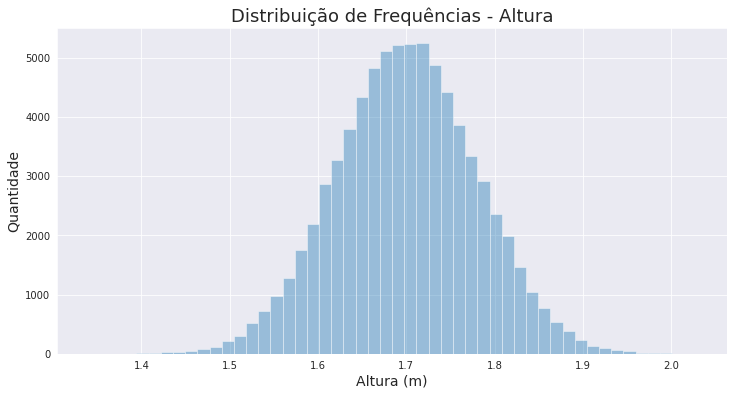

In [33]:
# usando distplot() sem a curva de densidade
sns.set_style("darkgrid")
ax = sns.distplot(a=df.altura, kde=False)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências - Altura', fontsize=18)
ax.set_xlabel('Altura (m)', fontsize=14)
ax.set_ylabel('Quantidade', fontsize=14)
bx = ax

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


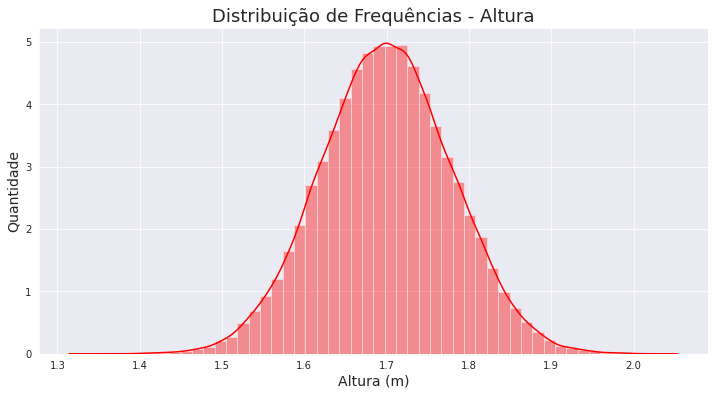

In [34]:
# usando distplot() com a curva de densidade
ax = sns.distplot(a=df.altura, color='red')

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências - Altura', fontsize=18)
ax.set_xlabel('Altura (m)', fontsize=14)
ax.set_ylabel('Quantidade', fontsize=14)
bx = ax

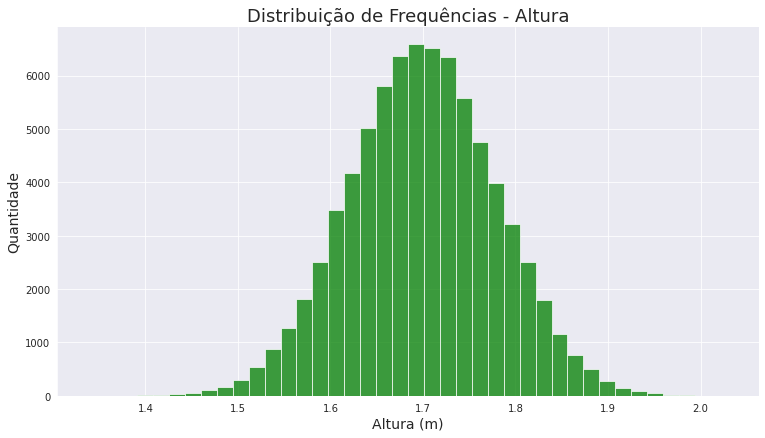

In [35]:
# displot() definindo legendas com plt
ax = sns.displot(data=df.altura, color='green', bins=40)

ax.figure.set_size_inches(12, 6)
plt.title('Distribuição de Frequências - Altura', fontsize=18)
plt.xlabel('Altura (m)', fontsize=14)
plt.ylabel('Quantidade', fontsize=14)
bx = ax

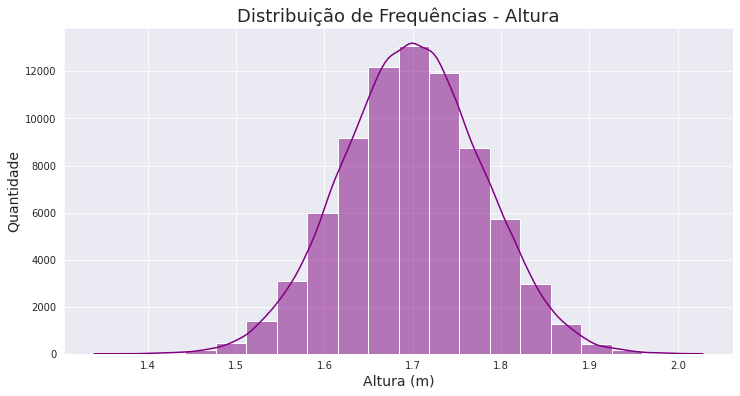

In [36]:
# histplot() separando os dados em 20 classes, com curva de densidade e definindo legendas com plt
ax = sns.histplot(data=df.altura, bins=20, kde=True, color='purple')

ax.figure.set_size_inches(12, 6)
plt.title('Distribuição de Frequências - Altura', fontsize=18)
plt.xlabel('Altura (m)', fontsize=14)
plt.ylabel('Quantidade', fontsize=14)
bx = ax

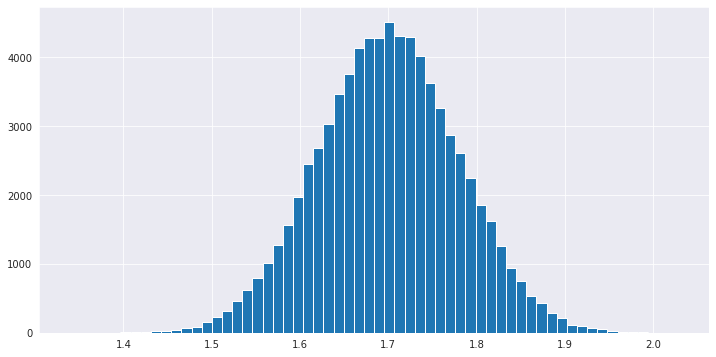

In [37]:
# usanso pandas para plotar
ax = df.altura.hist(bins=60, figsize=(12, 6))

Podemos também fazer um histograma a partir de uma função que gera um gráfico de barras, vamos usar a distribuição de frequências da renda que foi classificada nas classes de A-E:

In [38]:
dist_freq_quantitativa_personalizada

,Frequencia,Percentual
A,608,0.008
B,2178,0.028
C,7599,0.099
D,16700,0.217
E,49755,0.648


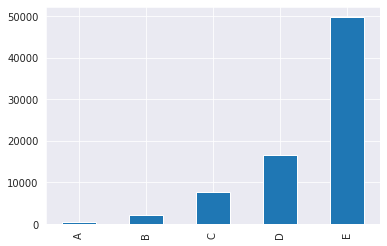

In [39]:
# grafico de barras
ax = dist_freq_quantitativa_personalizada.Frequencia.plot.bar()

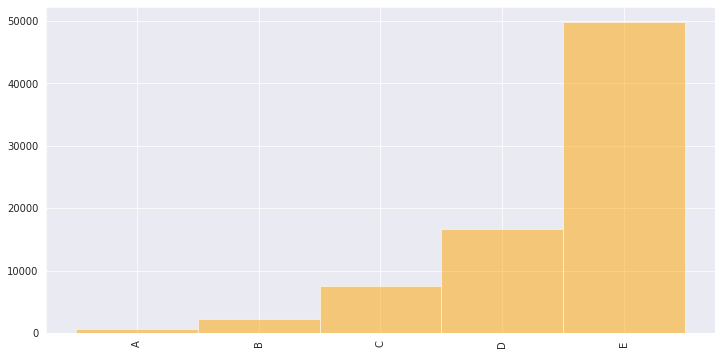

In [40]:
# histograma
ax = dist_freq_quantitativa_personalizada.Frequencia.plot.bar(width=1, color='orange', alpha=0.5, figsize=(12, 6))

## 3 Medidas de tendência central

In [41]:
notas = pd.DataFrame(
    data={'Joao':  [8,  10,   4, 8, 6,  10,  8],
          'Maria': [10,  2, 3, 1, 3, 9.5, 10],
          'Bruno': [7.5, 8,   7, 8, 8, 8.5,  7]}
    ,index=['matematica', 'portugues', 'ingles', 'geografia', 'historia', 'fisica', 'quimica']
).rename_axis('materias', axis='columns')
notas

materias,Joao,Maria,Bruno
matematica,8,10.0,7.5
portugues,10,2.0,8.0
ingles,4,3.0,7.0
geografia,8,1.0,8.0
historia,6,3.0,8.0
fisica,10,9.5,8.5
quimica,8,10.0,7.0


### 3.1 Média aritmética

As medidas de tendência central tem por objetivo sumarizar nossos dados de forma a facilitar seu entendimento, partindo de uma amostra com milhares de observações e chegando a uma única medida que nos ajude a compreender o comportamente do todo.

A **média** pode ser entendida como o _"centro de massa"_ da distribuiçao de uma variável. Ela representa o ponto de equilíbrio dessa distribuição e, sendo assim, é muito sensível aos extremos da distribuição. Por isso, existem situações em que a **média** pode não ser a medida mais indicada para representar uma variável.

Matemáticamente a média aritmética $ \mu $, para uma população, é representada pela seguinte equação:

$ \mu = \frac{1}{n} \; \sum \limits _{i=1} ^{n} X_{i} $

onde $ n $ é o número de observações (registros) e $ X_{i} $ é o valor da i-ésima observação (registro). Ou seja, é a divisão da soma de todos os valores observados pelo número de observações. Também podemos usar $ \hat X $ para denotar a média de uma amostra.

Como exemplo, vamos calcular a **média** de todas as notas do João, primeiro "na mão" e depois usando um método do Pandas:

In [42]:
notas.Joao.to_list()

[8, 10, 4, 8, 6, 10, 8]

In [43]:
(8 + 10 + 4 + 8 + 6 + 10 + 8) / 7

7.714285714285714

In [44]:
# usando Pandas
notas.Joao.mean()

7.714285714285714

Note que nem todas variáveis podem ter sua média calculada, é o caso das variáveis qualitativas, por exemplo, `sexo`, `cor` e `uf` no df do PNAD. O que podemos fazer é calcular a média de variáveis quantitativas em função das variáveis qualitativas.

In [45]:
df.groupby(by=['sexo']).mean()

,uf,idade,cor,anos_de_estudo,renda,altura
sexo,,,,,,
0,31.901991,44.046554,5.038685,9.120169,2192.441596,1.699443
1,31.937728,44.127554,5.018906,10.258584,1566.847393,1.699670


Na saída acima observamos exatamente como a média de variáveis qualitativas não faz sentido. Para alguns casos de variáveis qualitativas ordinais, ainda pode ser que seja possível obter um significado válido para essa medida, mas via de regra é uma medida reservada às variáveis numéricas.

In [46]:
df.groupby(by=['sexo'])[['idade', 'renda', 'altura']].mean()

,idade,renda,altura
sexo,,,
0,44.046554,2192.441596,1.699443
1,44.127554,1566.847393,1.699670


### 3.2 Mediana

A **mediana** é a medida que separa ao meio uma série de valores. Ou seja, após ordenar minha série de valores vou ter metadade dos valores de um lado da  **mediana** e a outra metada no outro lado.

Para determinar a mediana temos alguns passos que nos auxiliam, primeiro ordenamos o conjunto de dados e verificamos seu tamanho (número de observações $n$), para determinar se o $n$ é _par_ ou _ímpar_. Se for _par_, a posição do elemento mediado é dada por $ S_{Md} \; = \; \frac{n}{2} $, e _ímpar_ por $ S_{Md} \; = \; \frac{n+1}{2} $.

No caso de um conjunto de tamanho ímpar, a mediana será o valor que está na posição mediana: $ Md \; = \; X_{S_{Md}} $. Para um $n$ par devemos fazer $ Md \; = \; \frac{X_{S_{Md}} \; + \; X_{S_{Md}+1}}{2} $.

Como exemplo vamos novamente usar as notas do João, primeiro calculando a **mediana** "na mão" e depois usando um método do Pandas:

In [47]:
notas.Joao

matematica     8
portugues     10
ingles         4
geografia      8
historia       6
fisica        10
quimica        8
Name: Joao, dtype: int64

In [48]:
# notas ordenadas e com indices que representam a posicao de cada elemento
notas_ordenadas_joao = notas.Joao.sort_values()
n = notas_ordenadas_joao.shape[0]
print(f"{n} notas\n")
notas_ordenadas_joao.index = range(1, n+1)
notas_ordenadas_joao

7 notas



1     4
2     6
3     8
4     8
5     8
6    10
7    10
Name: Joao, dtype: int64

In [49]:
print(f"n={n} é {'par' if n % 2 == 0 else 'ímpar'}")

n=7 é ímpar


In [50]:
# posicao mediana
s_med = int((n + 1) / 2)
s_med

4

In [51]:
# valor da mediana
notas_ordenadas_joao[s_med]

8

In [52]:
# usando Pandas
notas.Joao.median()

8.0

Vamos determinar a **mediana** para as as notas da Maria agora, mas retirando aleatóriamente uma delas, para que nossa amostra tenha um número _par_ de observações.

In [53]:
notas_maria = notas.Maria.sample(6, random_state=1)
notas_maria

quimica       10.0
ingles         3.0
portugues      2.0
matematica    10.0
historia       3.0
geografia      1.0
Name: Maria, dtype: float64

In [54]:
# notas ordenadas e com indices que representam a posicao de cada elemento
notas_ordenadas_maria = notas_maria.sort_values()
n = notas_ordenadas_maria.shape[0]
print(f"{n} notas\n")
notas_ordenadas_maria.index = range(1, n+1)
notas_ordenadas_maria

6 notas



1     1.0
2     2.0
3     3.0
4     3.0
5    10.0
6    10.0
Name: Maria, dtype: float64

In [55]:
print(f"n={n} é {'par' if n % 2 == 0 else 'ímpar'}")

n=6 é par


In [56]:
# posicao mediana do conjunto ordenado
s_med = int(n / 2)
s_med

3

In [57]:
# valor na posicao mediana
x_med_0 = notas_ordenadas_maria[s_med]
x_med_0

3.0

In [58]:
# valor na posicao seguinte a mediana
x_med_1 = notas_ordenadas_maria[s_med+1]
x_med_1

3.0

In [59]:
# valor da mediana
(x_med_0 + x_med_1) / 2

3.0

In [60]:
# usando Pandas
notas_maria.median()

3.0

Agora podemos determinar a mediana para algumas de nossas variáveis do _dataset_ do PNAD.

In [61]:
df.groupby(by=['sexo'])[['idade', 'renda', 'altura']].median()

,idade,renda,altura
sexo,,,
0,43.0,1350.0,1.699249
1,44.0,900.0,1.699573


In [62]:
df.groupby(by=['cor'])[['idade', 'renda', 'altura']].quantile()

,idade,renda,altura
cor,,,
0,41.0,788.0,1.703850
2,45.0,1500.0,1.699406
4,43.0,1000.0,1.699658
6,45.0,2450.0,1.693964
8,42.0,1000.0,1.699237


### 3.3 Moda

A **moda** é definida como _"o valor mais frequente em um conjunto de dados"_.

Essa medida pode ter mais de um valor para um conjunto, no caso de termos dois valores para a moda em um conjunto de dados dizemos ter uma variável **bimodal** e mais do que duas já dizemos **multimodal**.

Essa estatística descritiva é muito útil para variáveis qualitativas.


In [63]:
# moda para a distribuição de notas de cada aluno
notas.mode()

materias,Joao,Maria,Bruno
0,8.0,3.0,8.0
1,NaN,10.0,NaN


In [64]:
notas.Maria.value_counts()

10.0    2
3.0     2
2.0     1
1.0     1
9.5     1
Name: Maria, dtype: int64

Podemos ver que a distribuição de notas para a aluna Maria é bimodal, com as notas '3.0' e '10.0' aparecendo duas vezes cada.

Podemos explorar a **moda** nas variáveis do _dataset_ de rendas do PNAD:

In [65]:
df.mode()

,uf,sexo,idade,cor,anos_de_estudo,renda,altura,faixa_renda
0,35.0,0.0,40.0,8.0,12.0,788.0,1.568128,E
1,NaN,NaN,NaN,NaN,NaN,NaN,1.671225,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,1.681659,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,1.692977,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,1.708163,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,1.708370,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,1.753842,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,1.779073,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,1.796462,NaN


Para as variáveis qualitativas `idade` e `renda` até faz sentido o resultado que encontramos, primeiro porque são variáveis numéricas inteiras, e além disso, para a `renda` temos um comportamento característico sendo evidênciado. Quando analisamos distribuições de renda é esperado que o valor que mais apareça seja o do salário mínimo.

Quando olhamos para o resultado da variável `altura` vemos que se trata de uma variável multimodal e, nesse caso, a moda não nos diz muita coisa.

### 3.4 Relação entre Média, Mediana e Moda

Após calcularmos os valores de cada uma dessas estatísticas descritivas, podemos verificar a relação entre essas medidas e tentar determinar o tipo de simetria da distruição dos dados, que pode ser:

- **Assimétrica à direita**: Média > Mediana > Moda
- **Simétrica**: Média = Mediana = Moda
- **Assimétrica à esquerda**: Média < Mediana < Moda

Vamos começar a determinar o tipo de distribuição das variáves do _dataset_ de renda do PNAD, avaliando essas medidas descritivas. Começando pela variável `renda`:

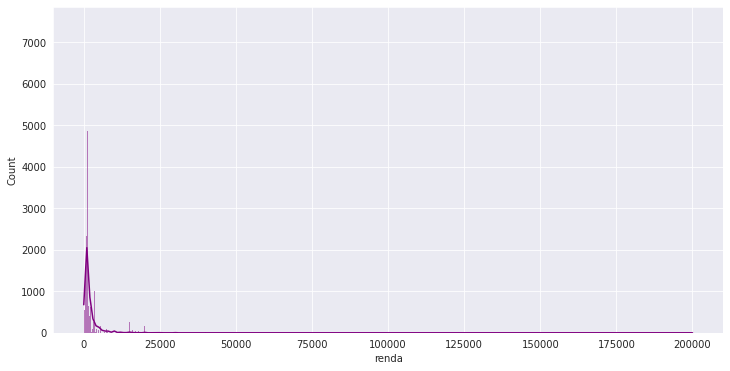

In [66]:
ax = sns.histplot(data=df.renda, kde=True, color='purple')
ax.figure.set_size_inches(12, 6)
# ax.set(ylim=(0, 2500))

Plotando a distribuição completa mal conseguimos ver o o formato da distribuição, tamanha a assimetria à direita. Então olhando para o _range_ do eixo `renda` lembramos que existe uma pessoa com renda de R\$ 200.000,00 em nosso _dataset_, que muito provavelmente é um dos (se não o principal) ponto responsável pela assimetria. Podemos selecionar apenas os pontos com renda inferior a R\$ 20.000,00 e plotar o gráfico novamente:

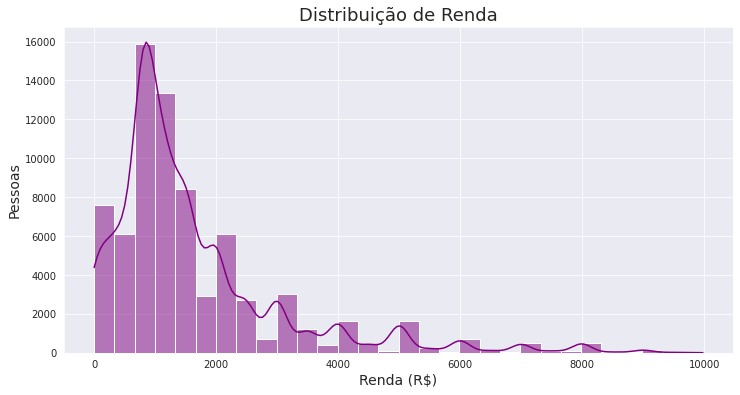

In [67]:
ax = sns.histplot(data=df.query("renda < 10000").renda, bins=30, kde=True, color='purple')
ax.figure.set_size_inches(12, 6)
plt.title('Distribuição de Renda', fontsize=18)
plt.xlabel('Renda (R$)', fontsize=14)
plt.ylabel('Pessoas', fontsize=14)
bx = ax

In [68]:
moda_renda = df.renda.mode()[0]
moda_renda

788

In [69]:
mediana_renda = df.renda.median()
mediana_renda

1200.0

In [70]:
media_renda = df.renda.mean()
media_renda

2000.3831988547631

Passamos agora para a variável `altura`, que já sabemos ser uma variável multimodal:

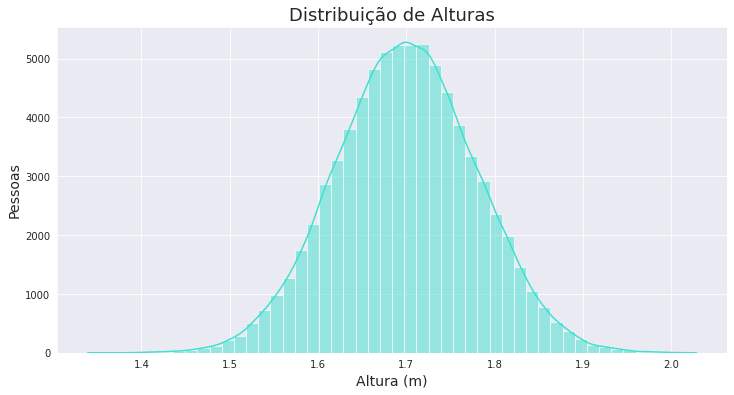

In [71]:
ax = sns.histplot(data=df.altura, bins=50, kde=True, color='turquoise')
ax.figure.set_size_inches(12, 6)
plt.title('Distribuição de Alturas', fontsize=18)
plt.xlabel('Altura (m)', fontsize=14)
plt.ylabel('Pessoas', fontsize=14)
bx = ax

In [72]:
modas_altura = df.altura.mode()
modas_altura

0    1.568128
1    1.671225
2    1.681659
3    1.692977
4    1.708163
5    1.708370
6    1.753842
7    1.779073
8    1.796462
dtype: float64

In [73]:
# média das modas (apenas para fins de comparação)
moda_altura = modas_altura.mean()
moda_altura

1.7066552394444443

In [74]:
mediana_altura = df.altura.median()
mediana_altura

1.6993247325

In [75]:
media_altura = df.altura.mean()
media_altura

1.6995124540575812

Apesar de os valores das medidas descritivas não serem exatamente iguais, eles são muito próximos. Além disso o gráfico da distribuição tem o formato de sino tão desejado, portanto, podemos dizer que a altura é uma variável com distribuição normal.

E por fim podemos ver como fica a variável `anos_de_estudo`:

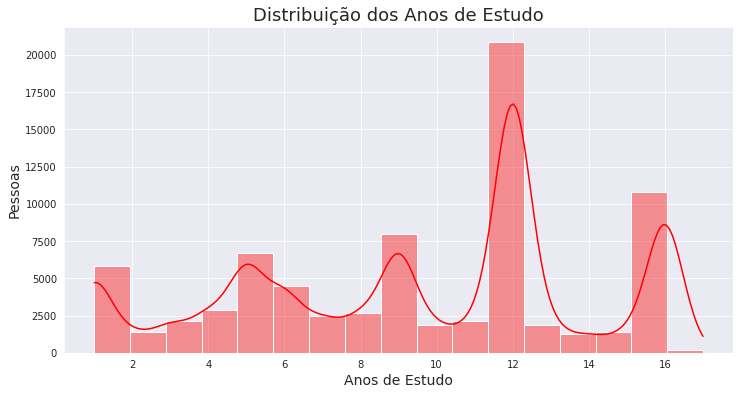

In [76]:
ax = sns.histplot(data=df.anos_de_estudo, bins=17, kde=True, color='red', alpha=0.4)
ax.figure.set_size_inches(12, 6)
plt.title('Distribuição dos Anos de Estudo', fontsize=18)
plt.xlabel('Anos de Estudo', fontsize=14)
plt.ylabel('Pessoas', fontsize=14)
bx = ax

Vemos aqui um gráfico um pouco diferente dos anteriores, com vários vales e picos bem definidos. Esses picos podem ser relacionados com os anos "completos", a quantidade de anos necessária para completar o ensino colegial ou o ensino superior.

Mesmo com esse formato podemos "chutar" que se trata de uma variável com distribuição assimétrica à esquerda. Verificando:

In [77]:
moda_anos_de_estudo = df.anos_de_estudo.mode()[0]
moda_anos_de_estudo

12

In [78]:
mediana_anos_de_estudo = df.anos_de_estudo.median()
mediana_anos_de_estudo

11.0

In [79]:
media_anos_de_estudo = df.anos_de_estudo.mean()
media_anos_de_estudo

9.469664237376367

In [80]:
# aplicando o "teste"
for variavel in ['renda', 'anos_de_estudo']:
    print(f"A variável `{variavel}` possui:\n",
        f"- Assimetria à direita: \t{df[variavel].mean() > df[variavel].median() > df[variavel].mode()[0]}\n",
        f"- Simetria normal: \t\t{df[variavel].mean() == df[variavel].median() == df[variavel].mode()[0]}\n",
        f"- Aimetria à direita: \t\t{df[variavel].mean() < df[variavel].median() < df[variavel].mode()[0]}\n")

A variável `renda` possui:
 - Assimetria à direita: 	True
 - Simetria normal: 		False
 - Aimetria à direita: 		False

A variável `anos_de_estudo` possui:
 - Assimetria à direita: 	False
 - Simetria normal: 		False
 - Aimetria à direita: 		True



## 4 Medidas separatrizes

### 4.1 Quartis, decis e percentis

Na seção anterior já vimos uma medida separatriz, a **mediana**, que divide uma amostra de dados em duas partes iguais, deixando a mesma quantidade de dados para cada lado. Dessa mesma forma temos outras medidas separatrizes, mas que separam o conjunto em mais que duas partes.

Uma característica interessante dessas medidas é que elas não são influencidas por valores extremos. Por exemplo, a variável `renda` no _dataset_ do PNAD possui um registro de uma pessoa ganhando R\$ 200.000,00, enquanto a maioria ganha um salário mínimo. Esse ponto que distoa muito dos dados restantes causa uma distorção no valor médio da distribuição, nos levando a considerar que a média não seja uma medida muito adequada para representar a variável.

Outra coisa a se considerar é que podemos utilizar as medidas separatrizes para separar os dados em faixas de forma bastante simples.

As medidas separatrizes mais comuns são: os quartis, separa a amostra em quatro partes; os decis, separa em dez partes; e os percentis, em cem partes. Para determinar os valores de cada umas dessas medidas precisamos nos ater que, ao dividir uma amostra em N partes, precisamos de N-1 divisores. Para a mediana (2 partes) precisamos de 1 divisor (0,50) e para os quartis (4 partes) devemos ter 3 (0,25, 0,50 e 0,75).

Vamos começar usando o método `quantile()`:

In [81]:
# por padrão retorna o valor da mediana
df.renda.quantile()

1200.0

In [82]:
# calculando mediana explicitamente
df.renda.quantile(q=0.5)

1200.0

Esse método também funciona recebendo uma lista em que informamos os valores que queremos. Se quisermos calcular os quartis devemos saber que o primeiro quartil é o valor em que temos os primeiros 25% dos dados abaixo dele e 75% acima, e assim por diante:

In [83]:
# calculando os quartis
df.renda.quantile(q=[0.25, 0.50, 0.75])

0.25     788.0
0.50    1200.0
0.75    2000.0
Name: renda, dtype: float64

In [84]:
# gera os divisores para calcular os decis
# lembrando que como são dez intervalos, precisamos de 9 divisores
divisores_decis = [i/10 for i in range(1, 10)]
divisores_decis

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [85]:
# calculando os decis
df.renda.quantile(q=divisores_decis)

0.1     350.0
0.2     788.0
0.3     800.0
0.4    1000.0
0.5    1200.0
0.6    1500.0
0.7    1900.0
0.8    2500.0
0.9    4000.0
Name: renda, dtype: float64

In [86]:
# gera os divisores para calcular os percentis
divisores_percentis = [i/100 for i in range(1, 100)]

In [87]:
# calculando os percentis
percentis_renda = df.renda.quantile(q=divisores_percentis)
percentis_renda

0.01        0.0
0.02        0.0
0.03        0.0
0.04       50.0
0.05      100.0
         ...   
0.95     6000.0
0.96     7000.0
0.97     8000.0
0.98    10000.0
0.99    15000.0
Name: renda, Length: 99, dtype: float64

Uma coisa interessante é que a medida que aumentamos os intervalos em que os dados são separados podemos obter uma maior granularidade na informação que estamos interessado. Por exemplo, de acordo com os decis diríamos que 20% dos entrevistados ganham até um salário mínimo. Mas com os percentis podemos ver que 28% dos entrevistados ganham até um salário mínimo.

In [88]:
percentis_renda.iloc[25:30]

0.26    788.0
0.27    788.0
0.28    788.0
0.29    789.0
0.30    800.0
Name: renda, dtype: float64

Vamos calcular os decis para a variável `idade` e plotar um gráfico de distribuição de frequências acumuladas para comparar os resultados:

In [89]:
# decis para idade
df.idade.quantile(q=divisores_decis)

0.1    28.0
0.2    33.0
0.3    36.0
0.4    40.0
0.5    43.0
0.6    47.0
0.7    51.0
0.8    55.0
0.9    61.0
Name: idade, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


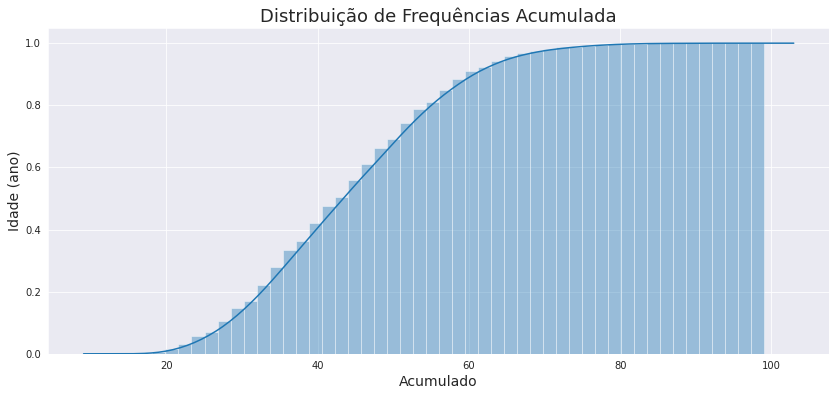

In [90]:
ax = sns.distplot(df.idade, hist_kws={'cumulative': True}, kde_kws={'cumulative': True})
ax.figure.set_size_inches(14, 6)
plt.title('Distribuição de Frequências Acumulada', fontsize=18)
plt.xlabel('Acumulado', fontsize=14)
plt.ylabel('Idade (ano)', fontsize=14)
bx = ax

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


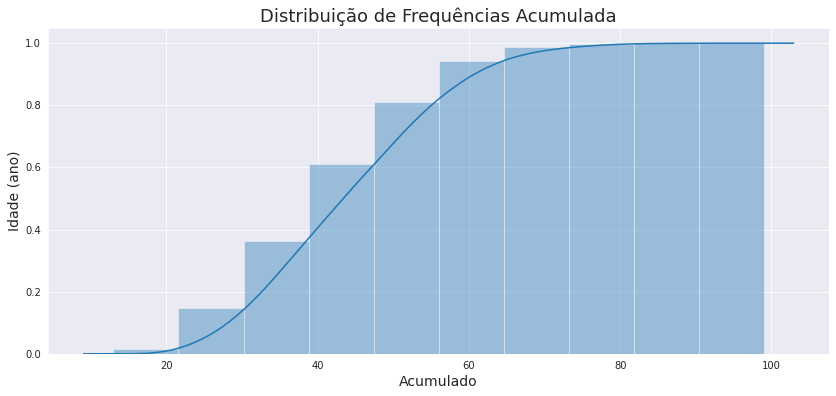

In [91]:
# mesmo gráfico, mas com 10 bins
ax = sns.distplot(df.idade, hist_kws={'cumulative': True}, kde_kws={'cumulative': True}, bins=10)
ax.figure.set_size_inches(14, 6)
plt.title('Distribuição de Frequências Acumulada', fontsize=18)
plt.xlabel('Acumulado', fontsize=14)
plt.ylabel('Idade (ano)', fontsize=14)
bx = ax

### 4.2 Boxplot

O gráfico de boxplot nos dá uma idéia da posição, dispersão, assimetria, caudas e _outliers_ do conjunto de dados. As posições relativas de $Q1$ (25% dos dados ficam abaixo desse valor e 75% acima), $Mediana$ (posição central) e $Q3$ (75% dos dados ficam abaixo) são os quartis e nos dão uma noção da simetria da distribuição. A dispersão é dada pela distância entre os quartis $Q1$ e $Q3$, que é chamado de Intervalo Inter Quartil ($IIQ$). Os limites superior e inferior dependem dos quartis mais próximos e do $IIQ$ e nos permitem identificar dados que podem ser _outliers_ (valores discrepantes).

<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img005.png' width='50%'>

<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img006.png' width='60%'>

Começamos plotando um boxplot apenas para a variável `altura` e depois abrindo pela variável `sexo`:

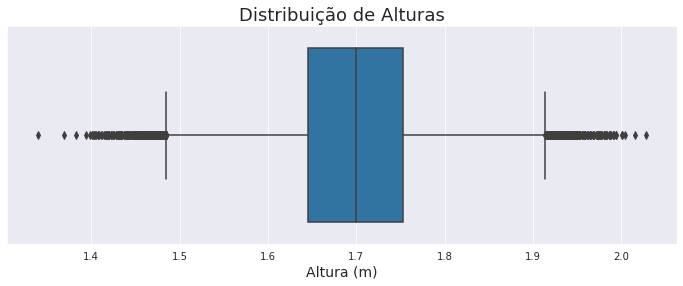

In [92]:
ax = sns.boxplot(x='altura', data=df, orient='h')
ax.figure.set_size_inches(12, 4)
plt.title('Distribuição de Alturas', fontsize=18)
plt.xlabel('Altura (m)', fontsize=14)
bx = ax

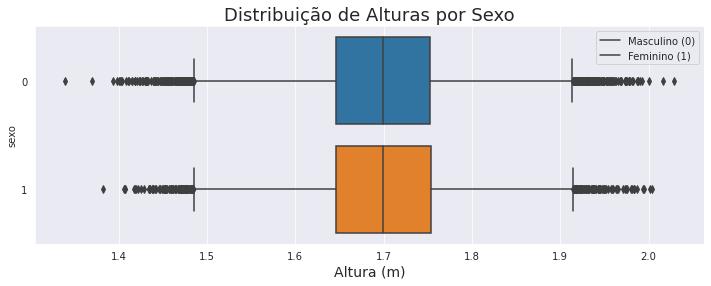

In [93]:
ax = sns.boxplot(data=df, x='altura', y='sexo', orient='h')
ax.figure.set_size_inches(12, 4)
plt.title('Distribuição de Alturas por Sexo', fontsize=18)
plt.xlabel('Altura (m)', fontsize=14)
plt.legend(labels=["Masculino (0)","Feminino (1)"])
bx = ax

Note que `altura` se trata de uma variável bem simétrica. Então vamos fazer o mesmo gráfico para `renda` agora:

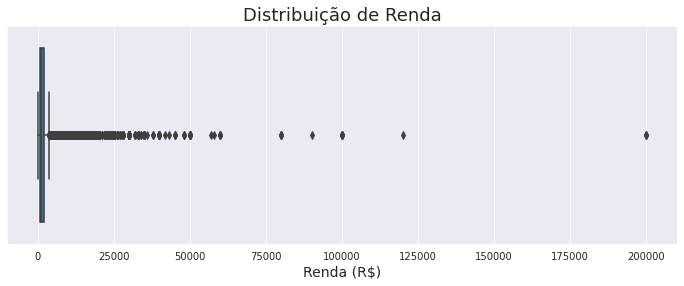

In [94]:
ax = sns.boxplot(data=df, x='renda', orient='h')
ax.figure.set_size_inches(12, 4)
plt.title('Distribuição de Renda', fontsize=18)
plt.xlabel('Renda (R$)', fontsize=14)
bx = ax

Fica bem evidente a assimetria à direita, inclusive aquele ponto nos R\$ 200.000,00. Vamos selecionar os dados usados no plot apenas para fins de facilitar a visualização:

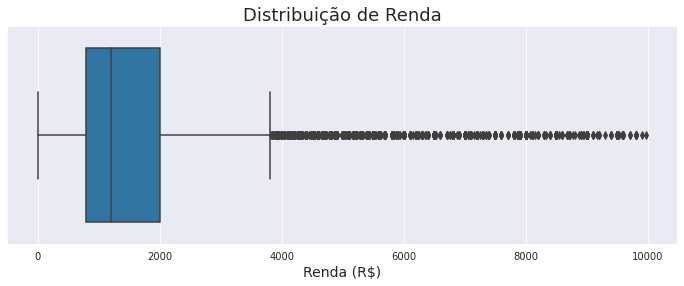

In [95]:
ax = sns.boxplot(data=df.query("renda < 10000"), x='renda', orient='h')
ax.figure.set_size_inches(12, 4)
plt.title('Distribuição de Renda', fontsize=18)
plt.xlabel('Renda (R$)', fontsize=14)
bx = ax

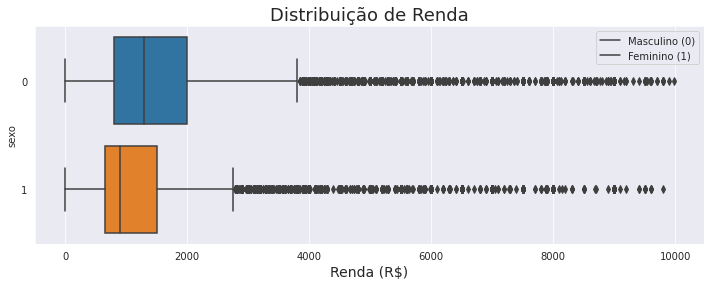

In [96]:
ax = sns.boxplot(data=df.query("renda < 10000"), x='renda', y='sexo', orient='h')
ax.figure.set_size_inches(12, 4)
plt.title('Distribuição de Renda', fontsize=18)
plt.xlabel('Renda (R$)', fontsize=14)
plt.legend(labels=["Masculino (0)","Feminino (1)"])
bx = ax

Quando abrimos a distribuição por sexo já somos capazes de ver que existe uma diferença de renda entre homens e mulheres.

Vamos passar para a variável `anos_de_estudo` agora, fingindo que se tratam de tempo em anos e não classes:

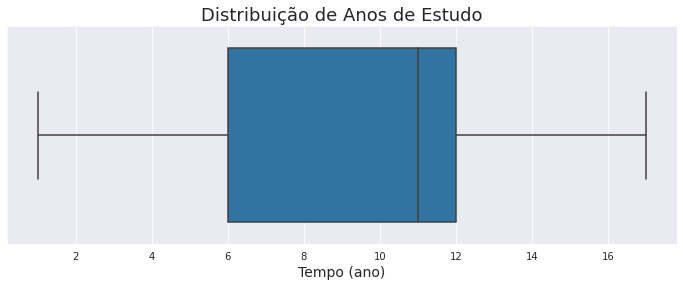

In [97]:
ax = sns.boxplot(data=df, x='anos_de_estudo', orient='h')
ax.figure.set_size_inches(12, 4)
plt.title('Distribuição de Anos de Estudo', fontsize=18)
plt.xlabel('Tempo (ano)', fontsize=14)
bx = ax

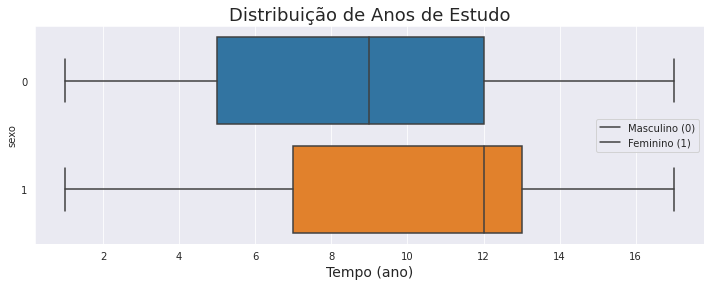

In [98]:
ax = sns.boxplot(data=df, x='anos_de_estudo', y='sexo', orient='h')
ax.figure.set_size_inches(12, 4)
plt.title('Distribuição de Anos de Estudo', fontsize=18)
plt.xlabel('Tempo (ano)', fontsize=14)
plt.legend(labels=["Masculino (0)","Feminino (1)"])
bx = ax

No primeiro gráfico observamos uma distribuição assimétrica à esquerda e no segundo vemos que as mulheres possuem mais tempo de escolaridade que os homens. Aqui podemos ver quão interessante é esse tipo de gráfico, a partir dele somos capazes de verificar que as mulheres estudam mais que os homens e apesar disso ganham menos.

## 5 Medidas de dispersão

Embora as medidas de posição forneçam uma sumarização bastante importante dos dados, elas podem não ser suficientes para caracterizar conjuntos distintos, especialmente quando as observações de determinada distribuição apresentarem dados muito dispersos.

Vamos pegar como exemplo as notas tratadas na seção 3 e calcular as medidas de tendência central:

In [99]:
notas

materias,Joao,Maria,Bruno
matematica,8,10.0,7.5
portugues,10,2.0,8.0
ingles,4,3.0,7.0
geografia,8,1.0,8.0
historia,6,3.0,8.0
fisica,10,9.5,8.5
quimica,8,10.0,7.0


In [100]:
notas.mean()

materias
Joao     7.714286
Maria    5.500000
Bruno    7.714286
dtype: float64

In [101]:
notas.median()

materias
Joao     8.0
Maria    3.0
Bruno    8.0
dtype: float64

In [102]:
notas.mode()

materias,Joao,Maria,Bruno
0,8.0,3.0,8.0
1,NaN,10.0,NaN


Podemos ver que os alunos João e Bruno possuem o mesmo valor para as três grandezas estatísticas (média, mediana e moda). Mas se analisarmos as notas desses dois alunos veremos que Bruno é mais consistente, não tendo nenhuma nota abaixo de sete, enquanto João claramente da mais atenção para algumas matérias que outras. Ou seja, estamos vendo que as notas de João possuem uma dispersão maior que as de Bruno. 

Dessa forma fica claro que essas medidas não são suficientes para caracterizar completamente o comportamento dessas variáveis, precisamos agora de medidas de dispersão.

### 5.1 Desvio médio absoluto

É a média aritmética do _desvio absoluto_ de cada medida em relação à média da variável. A formula matemática para calcular essa medida é:

$ DM \; = \; \frac{1}{n} \sum \limits _{i=1} ^{n} | x_{i} - \overline{X} | $

- onde $n$ é o número de observações da amostra
- $x_{i}$ é a i-ésima observação
- $\overline{X}$ é a média aritmética da amostra

Primeiro vamos calcular o **desvio médio** na mão para as notas de João e Bruno:

In [103]:
# cria df com apenas a coluna de notas de João
notas_joao = notas[['Joao']]
notas_joao.columns = ['nota']
notas_joao

,nota
matematica,8
portugues,10
ingles,4
geografia,8
historia,6
fisica,10
quimica,8


In [104]:
# calcula nota média de João
media_joao = notas_joao.mean()[0]
media_joao

7.714285714285714

In [105]:
# adiciona coluna com desvio de cada nota em relação a média
notas_joao['desvio'] = notas_joao['nota'] - media_joao
notas_joao

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,nota,desvio
matematica,8,0.285714
portugues,10,2.285714
ingles,4,-3.714286
geografia,8,0.285714
historia,6,-1.714286
fisica,10,2.285714
quimica,8,0.285714


In [106]:
# cria coluna com o desvio absoluto
notas_joao['desvio_abs'] = notas_joao.desvio.abs()
notas_joao

,nota,desvio,desvio_abs
matematica,8,0.285714,0.285714
portugues,10,2.285714,2.285714
ingles,4,-3.714286,3.714286
geografia,8,0.285714,0.285714
historia,6,-1.714286,1.714286
fisica,10,2.285714,2.285714
quimica,8,0.285714,0.285714


Vamos plotar um gráfico de pontos para as notas mostrando a localização da nota média, o que nos permite visualizar o resultado de somar os valores de desvio é zero:

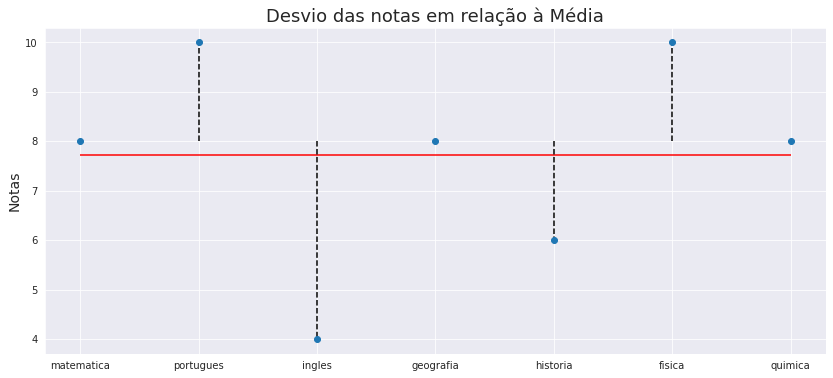

In [107]:
ax = notas_joao.nota.plot(style='o')
ax.figure.set_size_inches(14, 6)
ax.hlines(y=media_joao, xmin=0, xmax=notas_joao.shape[0]-1, colors='red')
for i in range(notas_joao.shape[0]):
    ax.vlines(x=i, ymin=notas_joao, ymax=notas_joao.nota[i], linestyles='dashed')
plt.title('Desvio das notas em relação à Média', fontsize=18)
plt.ylabel('Notas', fontsize=14)
bx = ax

In [108]:
# soma todos os desvios
notas_joao.desvio.sum()

-8.881784197001252e-16

In [109]:
# suprime apresentação em notação científica
f"{notas_joao.desvio.sum():.20f}"

'-0.00000000000000088818'

Agora sim, calculamos o valor do **desvio médio absoluto**:

In [110]:
# na mão
notas_joao.desvio_abs.sum() / notas_joao.shape[0]

1.5510204081632648

In [111]:
# um pouco menos na mão
notas_joao.desvio_abs.mean()

1.5510204081632648

In [112]:
# enfim, com Pandas
notas_joao.nota.mad()

1.5510204081632648

In [113]:
notas.Joao.mad()

1.5510204081632648

In [114]:
notas.Bruno.mad()

0.4693877551020408

### 5.2 Variância

Muito similar a forma como é calculado o desvio médio temos a **variância**. Mas aqui não fazemos o devio absoluto em relação à média, mas sim o _quadrado do desvio_. Dessa forma, quanto mais discrepante um ponto for, maior será o peso que ele terá nessa medida. Ou seja, quanto mais dispersa a distribuição for, mais penalizada será.

Outra diferença que temos em relação à medida anterior eh que possuímos duas fórmulas matemáticas: uma para dados populacionais e outra para amostrais. Como praticamente sempre estamos trabalhando com dados amostrais, dificilmente usaremos uma delas.

- variância populacional: $ \; {σ}^2 \; = \; \frac{1}{n} \sum \limits _{i=1} ^{n} {( x_{i} - 𝜇 )}^2 $

- variância amostral: $ \; {σ}^2 \; = \; \frac{1}{n-1} \sum \limits _{i=1} ^{n} {( x_{i} - \overline{X} )}^2 $

Vamos começar partindo do df de notas do João, adicionando uma coluna para o desvio elevado ao quadrado:

In [115]:
# eleva ao quadrado o desvio em relação á media 
notas_joao['desvio_square'] = notas_joao.desvio ** 2
notas_joao

,nota,desvio,desvio_abs,desvio_square
matematica,8,0.285714,0.285714,0.081633
portugues,10,2.285714,2.285714,5.224490
ingles,4,-3.714286,3.714286,13.795918
geografia,8,0.285714,0.285714,0.081633
historia,6,-1.714286,1.714286,2.938776
fisica,10,2.285714,2.285714,5.224490
quimica,8,0.285714,0.285714,0.081633


In [116]:
# calcula variância amostral na mão
variancia_notas_joao = notas_joao.desvio_square.sum() / (len(notas_joao)-1)
variancia_notas_joao

4.57142857142857

In [117]:
# calcula do jeito Pandas
notas_joao.nota.var()

4.57142857142857

In [118]:
notas.Joao.var()

4.57142857142857

In [119]:
notas.Bruno.var()

0.32142857142857145

### 5.3 Desvio padrão

Uma dificuldade associada à **variância** é o fato de que sua unidade de medida é o quadrado da unidade original, e isso causa dificuldade ao comparar a dispersão com a variável que a define. Por exemplo, a variância de medidas de comprimento é em unidades de área.

Um modo de eliminar essa dificuldade é considerar sua raiz quadrada. Ou seja, _o **desvio padrão** é a raíz quadrada da **variância**._

As fórmulas ficam:

- desvio padrão populacional: $ \; σ \; = \; \sqrt{ \frac{1}{n} \sum \limits _{i=1} ^{n} {( x_{i} - 𝜇 )}^2 } \; \Longrightarrow \; σ = \sqrt{ {σ}^2 } $

- desvio padrão amostral: $ \; S \; = \; \sqrt{ \frac{1}{n-1} \sum \limits _{i=1} ^{n} {( x_{i} - \overline{X} )}^2 } \; \Longrightarrow \; S = \sqrt{ {S}^2 } $

Já temos a **variância** das notas do João, calculada na etapa anterior, então vamos tirar sua raíz quadrada para obter o **desvio padrão** amostral:

In [120]:
np.sqrt(variancia_notas_joao)

2.1380899352993947

In [121]:
variancia_notas_joao ** (1/2)

2.1380899352993947

In [122]:
# jeito Pandas
notas.Joao.std()

2.1380899352993947

In [123]:
notas.Bruno.std()

0.5669467095138409

Se tivessemos usado apenas as medidas de tendência central para avaliar as distribuições de notas dos alunos Bruno e João, não seriamos capazes de ver diferenças. Mas após calcularmos as medidas de dispersão podemos entender como a distribuição das notas desses alunos são diferentes.

In [124]:
resumo_notas = {'media': notas.mean(),
                'mediana': notas.median(),
                'desvio_abs':notas.mad(),
                'variancia':notas.var(),
                'desvio_padrao':notas.std(),}
pd.DataFrame(resumo_notas).sort_index()

,media,mediana,desvio_abs,variancia,desvio_padrao
materias,,,,,
Bruno,7.714286,8.0,0.469388,0.321429,0.566947
Joao,7.714286,8.0,1.551020,4.571429,2.138090
Maria,5.500000,3.0,3.714286,16.916667,4.112988


## 6 Projeto

### 6.1 Analisando a variável `renda`

Para avaliarmos o comportamento da variável `renda` vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM), considerando que o salário mínimo na época da pesquisa era de **R\$ 788,00**.

- A: acima de 25 SM
- B: de 15 a 25 SM
- C: de 5 a 15 SM
- D: de 2 a 5 SM
- E: até 2 SM

In [125]:
# define os limites das classes em SMs
limites = [2, 5, 15, 25]
limites

[2, 5, 15, 25]

In [126]:
# cria lista com: primeiro valor, limites das classes e maior valor possivel, em reais
classes = [df.renda.min()] + [788*i for i in limites] + [df.renda.max()]
classes

[0, 1576, 3940, 11820, 19700, 200000]

In [127]:
classificacao_renda = pd.cut(x=df.renda, bins=classes, labels=rotulos, include_lowest=True)
classificacao_renda

0        E
1        E
2        E
3        D
4        E
        ..
76835    E
76836    E
76837    E
76838    E
76839    E
Name: renda, Length: 76840, dtype: category
Categories (5, object): ['E' < 'D' < 'C' < 'B' < 'A']

In [128]:
# define os rotulos das classes
rotulos = ['E', 'D', 'C', 'B', 'A']
rotulos

['E', 'D', 'C', 'B', 'A']

In [129]:
# cria series com os valores de renda classificados de acordo com os limites em `classes`, considerando menor valor como fechado
classificacao_renda_freq = pd.cut(x=df.renda, bins=classes, labels=rotulos, include_lowest=True)
classificacao_renda_freq

0        E
1        E
2        E
3        D
4        E
        ..
76835    E
76836    E
76837    E
76838    E
76839    E
Name: renda, Length: 76840, dtype: category
Categories (5, object): ['E' < 'D' < 'C' < 'B' < 'A']

In [130]:
# cria coluna de frequencias
freq = pd.value_counts(classificacao_renda_freq)
freq

E    49755
D    18602
C     7241
B      822
A      420
Name: renda, dtype: int64

In [131]:
df.shape[0] == freq.sum()

True

In [132]:
# cria coluna de distribuição percentual
perc = pd.value_counts(classificacao_renda, normalize=True).round(3)
perc

E    0.648
D    0.242
C    0.094
B    0.011
A    0.005
Name: renda, dtype: float64

In [133]:
perc.sum() 

1.0

In [134]:
# cria df com distribuições
df_class_renda = pd.DataFrame(data={'frequencia': freq, 'percentual': perc}).sort_index(ascending=False)
df_class_renda

,frequencia,percentual
A,420,0.005
B,822,0.011
C,7241,0.094
D,18602,0.242
E,49755,0.648


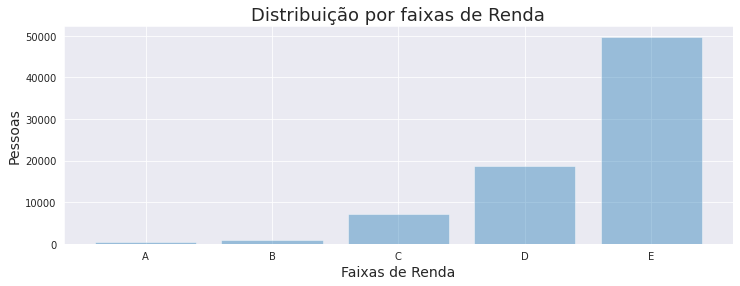

In [135]:
ax = df_class_renda.frequencia.plot.bar(width=0.8, alpha=0.4, figsize=(12, 4), rot=0)
ax = df_class_renda.percentual.plot.bar(width=0.8, alpha=0.4, figsize=(12, 4), rot=0)
plt.title('Distribuição por faixas de Renda', fontsize=18)
plt.xlabel('Faixas de Renda', fontsize=14)
plt.ylabel('Pessoas', fontsize=14)
bx = ax

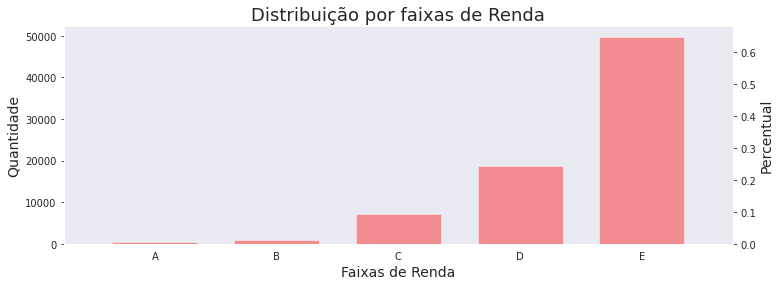

In [136]:
fig = plt.figure() # Create matplotlib figure
ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

df_class_renda.frequencia.plot(kind='bar', color='red', ax=ax, width=0.7, position=0.5, grid=False, alpha=0.4, rot=0)
df_class_renda.percentual.plot(kind='bar', color='blue', ax=ax2, width=1, position=0.5, grid=False, alpha=0, figsize=(12, 4))

ax.set_title('Distribuição por faixas de Renda', fontsize=18)
ax.set_xlabel('Faixas de Renda', fontsize=14)
ax.set_ylabel('Quantidade', fontsize=14)
ax2.set_ylabel('Percentual', fontsize=14)

plt.show()

### 6.2 Histograma para as variáveis quantitativas


#### 6.2.1 Idade


In [137]:
# valores distintos para variavel `idade`
print(f"{len(df.idade.unique())} valores diferentes\n")
np.array(sorted(df.idade.unique()))

84 valores diferentes



array([13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29,
       30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,
       47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63,
       64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80,
       81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 94, 95, 97, 99])

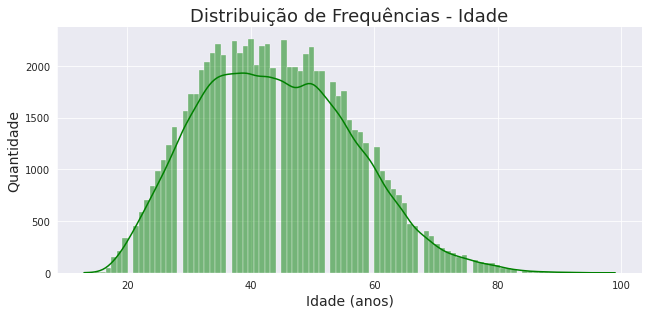

In [138]:
ax = sns.displot(data=df.idade, color='green', kde=True)
ax.figure.set_size_inches(10, 4)
plt.title('Distribuição de Frequências - Idade', fontsize=18)
plt.xlabel('Idade (anos)', fontsize=14)
plt.ylabel('Quantidade', fontsize=14)
bx = ax

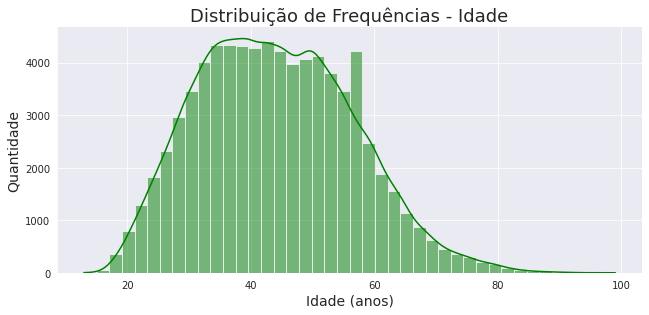

In [139]:
ax = sns.displot(data=df.idade, color='green', kde=True, bins=42)
ax.figure.set_size_inches(10, 4)
plt.title('Distribuição de Frequências - Idade', fontsize=18)
plt.xlabel('Idade (anos)', fontsize=14)
plt.ylabel('Quantidade', fontsize=14)
bx = ax

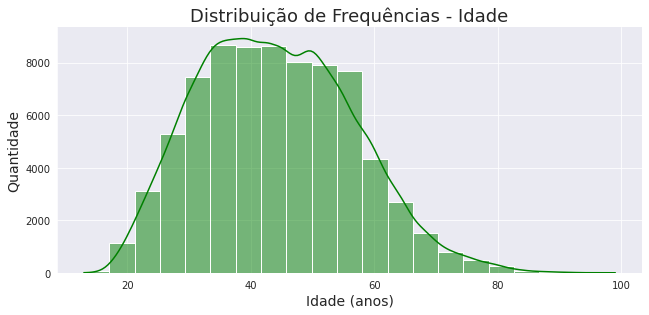

In [140]:
ax = sns.displot(data=df.idade, color='green', kde=True, bins=21)
ax.figure.set_size_inches(10, 4)
plt.title('Distribuição de Frequências - Idade', fontsize=18)
plt.xlabel('Idade (anos)', fontsize=14)
plt.ylabel('Quantidade', fontsize=14)
bx = ax

#### 6.2.2 Altura

In [141]:
print(f"{len(df.altura.unique())} valores unicos (sem arredondar)")
print(f"{len(df.altura.round(2).unique())} valores unicos (depois de arredondar para 2 casas decimais)\n")
np.array(sorted(df.altura.round(2).unique()))

76831 valores unicos (sem arredondar)
67 valores unicos (depois de arredondar para 2 casas decimais)



array([1.34, 1.37, 1.38, 1.39, 1.4 , 1.41, 1.42, 1.43, 1.44, 1.45, 1.46,
       1.47, 1.48, 1.49, 1.5 , 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57,
       1.58, 1.59, 1.6 , 1.61, 1.62, 1.63, 1.64, 1.65, 1.66, 1.67, 1.68,
       1.69, 1.7 , 1.71, 1.72, 1.73, 1.74, 1.75, 1.76, 1.77, 1.78, 1.79,
       1.8 , 1.81, 1.82, 1.83, 1.84, 1.85, 1.86, 1.87, 1.88, 1.89, 1.9 ,
       1.91, 1.92, 1.93, 1.94, 1.95, 1.96, 1.97, 1.98, 1.99, 2.  , 2.02,
       2.03])

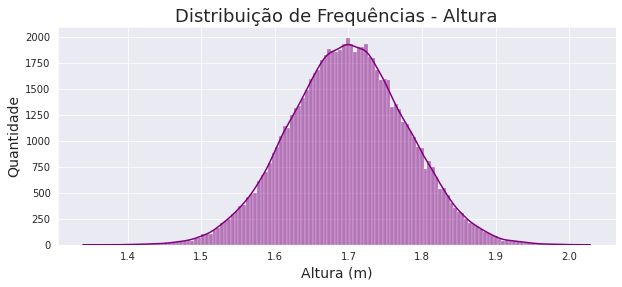

In [142]:
ax = sns.histplot(data=df.altura, kde=True, color='purple')
ax.figure.set_size_inches(10, 4)
plt.title('Distribuição de Frequências - Altura', fontsize=18)
plt.xlabel('Altura (m)', fontsize=14)
plt.ylabel('Quantidade', fontsize=14)
bx = ax

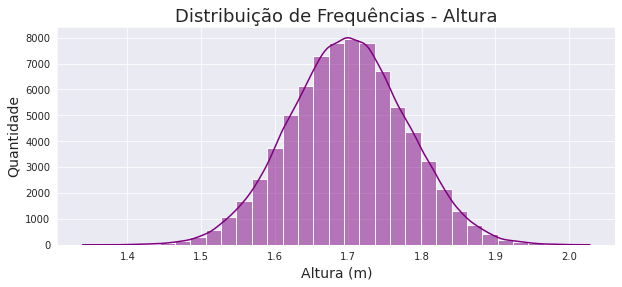

In [143]:
ax = sns.histplot(data=df.altura, bins=33, kde=True, color='purple')

ax.figure.set_size_inches(10, 4)
plt.title('Distribuição de Frequências - Altura', fontsize=18)
plt.xlabel('Altura (m)', fontsize=14)
plt.ylabel('Quantidade', fontsize=14)
bx = ax

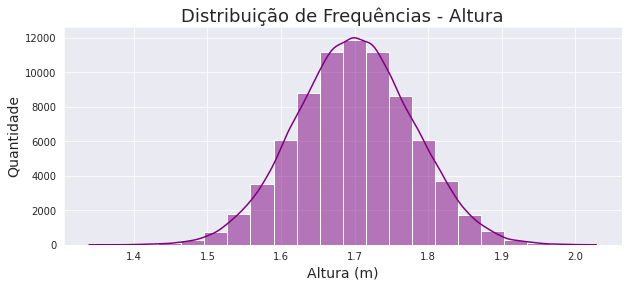

In [144]:
ax = sns.histplot(data=df.altura, bins=22, kde=True, color='purple')

ax.figure.set_size_inches(10, 4)
plt.title('Distribuição de Frequências - Altura', fontsize=18)
plt.xlabel('Altura (m)', fontsize=14)
plt.ylabel('Quantidade', fontsize=14)
bx = ax

#### 6.2.3 Renda

In [145]:
print(f"{len(df.query('renda <= 20000').renda.unique())} valores únicos (até R$ 20.000,00)")

1569 valores únicos (até R$ 20.000,00)


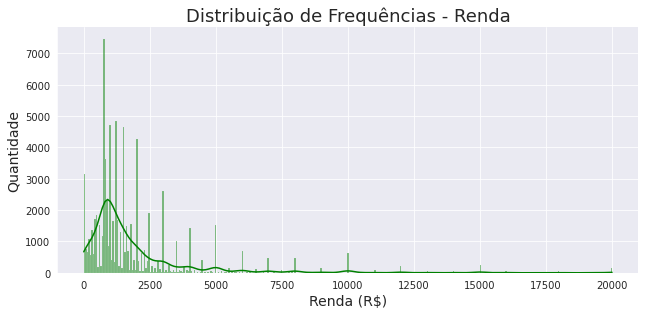

In [146]:
ax = sns.displot(data=df.query("renda <= 20000").renda, color='green', kde=True)
ax.figure.set_size_inches(10, 4)
plt.title('Distribuição de Frequências - Renda', fontsize=18)
plt.xlabel('Renda (R$)', fontsize=14)
plt.ylabel('Quantidade', fontsize=14)
bx = ax

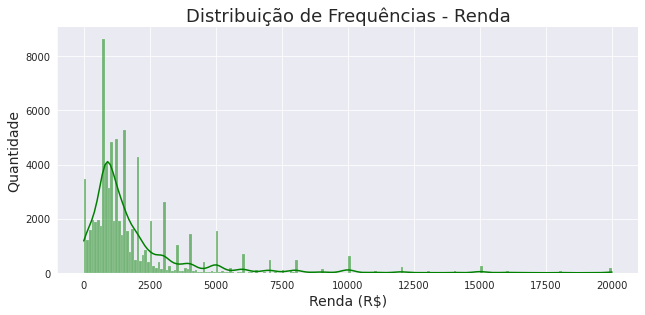

In [147]:
ax = sns.displot(data=df.query("renda <= 20000").renda, color='green', kde=True, bins=200)
ax.figure.set_size_inches(10, 4)
plt.title('Distribuição de Frequências - Renda', fontsize=18)
plt.xlabel('Renda (R$)', fontsize=14)
plt.ylabel('Quantidade', fontsize=14)
bx = ax

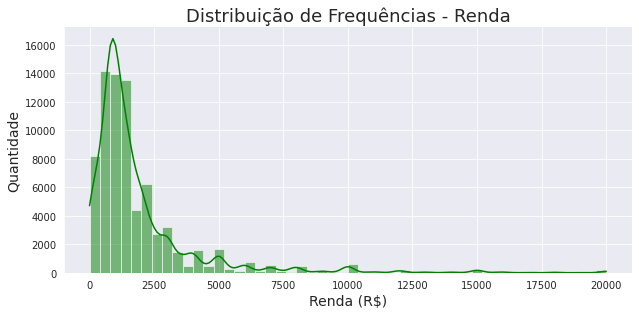

In [148]:
ax = sns.displot(data=df.query("renda <= 20000").renda, color='green', kde=True, bins=50)
ax.figure.set_size_inches(10, 4)
plt.title('Distribuição de Frequências - Renda', fontsize=18)
plt.xlabel('Renda (R$)', fontsize=14)
plt.ylabel('Quantidade', fontsize=14)
bx = ax

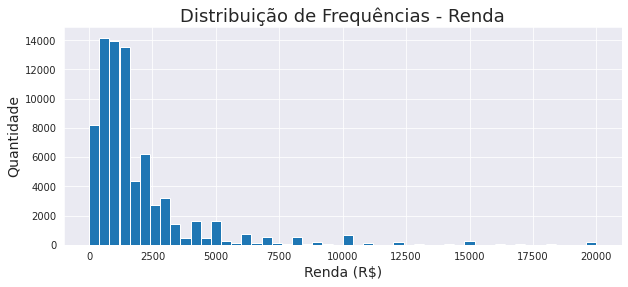

In [149]:
ax = df.query("renda <= 20000").renda.hist(bins=50, figsize=(10, 4))
plt.title('Distribuição de Frequências - Renda', fontsize=18)
plt.xlabel('Renda (R$)', fontsize=14)
plt.ylabel('Quantidade', fontsize=14)
bx = ax

### 6.3 Tabelas de frequencias e perncentuais cruzados para as variáveis `sexo` e `cor`

In [150]:
print(sexo)
print(cor)

{0: 'Masculino', 1: 'Feminino'}
{0: 'Indígena', 2: 'Branca', 4: 'Preta', 6: 'Amarela', 8: 'Parda', 9: 'Sem declaração'}


In [151]:
pd.crosstab(index=df.sexo, columns=df.cor).rename(index=sexo).rename(columns=cor)

cor,Indígena,Branca,Preta,Amarela,Parda
sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


### 6.4 Análise descritiva para a variável `renda`

#### 6.4.1 Medidas de tendência central e dispersão

In [152]:
# média
df.renda.mean()

2000.3831988547631

In [153]:
# mediana
df.renda.median()

1200.0

In [154]:
# moda
df.renda.mode()

0    788
dtype: int64

In [155]:
# desvio médio absoluto
df.renda.mad()

1526.4951371644931

In [156]:
# variância
df.renda.var()

11044906.00622118

In [157]:
# variância em notação cietífica
f"{df.renda.var():.2e}"

'1.10e+07'

In [158]:
# desvio padrão
df.renda.std()

3323.3877303470294

#### 6.4.2 Média, mediana e valor máximo da `renda` segundo `sexo` e `cor`

In [159]:
pd.crosstab(index=df.sexo, 
            columns=df.cor, 
            aggfunc=['mean', 'median', 'max'], 
            values=df.renda).rename(index=sexo).rename(columns=cor).round(2)

mean                                       median          \
cor       Indígena   Branca    Preta  Amarela    Parda Indígena  Branca   
sexo                                                                      
Masculino  1081.71  2925.74  1603.86  4758.25  1659.58    797.5  1700.0   
Feminino   2464.39  2109.87  1134.60  3027.34  1176.76    788.0  1200.0   

                                       max                                 
cor         Preta Amarela   Parda Indígena  Branca  Preta Amarela   Parda  
sexo                                                                       
Masculino  1200.0  2800.0  1200.0    10000  200000  50000   50000  100000  
Feminino    800.0  1500.0   800.0   120000  100000  23000   20000   30000

#### 6.4.3 Medidas de dispersão da `renda` segundo `sexo` e `cor`

In [160]:
pd.crosstab(index=df.sexo, 
            columns=df.cor, 
            aggfunc=['mad', 'var', 'std'], 
            values=df.renda).rename(index=sexo).rename(columns=cor).round(2)

mad                                              var  \
cor       Indígena   Branca   Preta  Amarela    Parda      Indígena   
sexo                                                                  
Masculino   798.91  2261.01  975.60  3709.60  1125.83  1.449841e+06   
Feminino   3007.89  1670.97  705.45  2549.15   811.58  1.429818e+08   

                                                                  std  \
cor             Branca       Preta      Amarela       Parda  Indígena   
sexo                                                                    
Masculino  22570023.41  3749293.59  32957069.62  5345747.15   1204.09   
Feminino   10569086.53  1821959.52  13921656.88  2547959.94  11957.50   

                                               
cor         Branca    Preta  Amarela    Parda  
sexo                                           
Masculino  4750.79  1936.31  5740.82  2312.09  
Feminino   3251.01  1349.80  3731.17  1596.23

#### 6.4.4 Boxplot da variável `renda` segundo `sexo` e `cor`

In [161]:
cor_rotulos = list(cor.values())
cor_rotulos

['Indígena', 'Branca', 'Preta', 'Amarela', 'Parda', 'Sem declaração']

In [162]:
sexo_rotulos = ['Masculino', 'Feminino']
sexo_rotulos

['Masculino', 'Feminino']

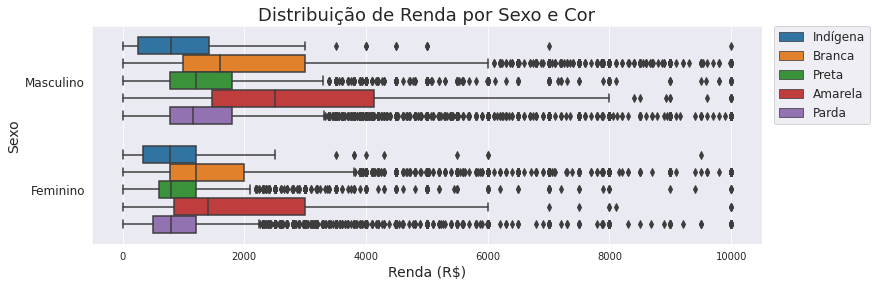

In [163]:
ax = sns.boxplot(data=df.query("renda <= 10000"), x='renda', y='sexo', hue='cor', orient='h')
ax.figure.set_size_inches(12, 4)

ax.set_title('Distribuição de Renda por Sexo e Cor', fontsize=18)

ax.set_xlabel('Renda (R$)', fontsize=14)

ax.set_ylabel('Sexo', fontsize=14)
ax.set_yticklabels(labels=sexo_rotulos, fontsize=12)

handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, cor_rotulos, fontsize=12, bbox_to_anchor=(1.17, 1.03))
bx = ax

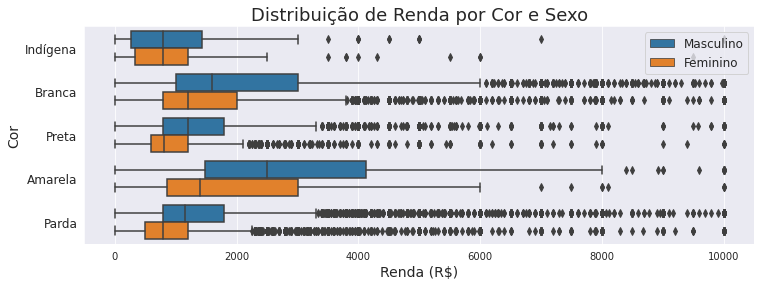

In [164]:
ax = sns.boxplot(data=df.query("renda <= 10000"), x='renda', y='cor', hue='sexo', orient='h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Distribuição de Renda por Cor e Sexo', fontsize=18)
ax.set_xlabel('Renda (R$)', fontsize=14)
ax.set_ylabel('Cor', fontsize=14)
ax.set_yticklabels(labels=cor_rotulos, fontsize=12)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, sexo_rotulos, fontsize=12)
bx = ax

### 6.5 Desafios

#### 6.5.1 Percentual de pessoas do _dataset_ que ganham um salário mínimo ou menos

Usando a função `percentileofscore()` do módulo `stats` do pacote [`scipy`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html) podemos encontrar o percentil correspondente a um valor de corte em uma série de valores.

In [165]:
# kind='rank' é o valor padrão
stats.percentileofscore(df.renda, 788)

24.390942217595004

Como estou interessado em pessoas que ganham um valor **menor ou igual** ao salário mínimo uso o parâmetro `kind='weak'`, dessa forma será calculado o percentil da última ocorrência do valor de corte:

In [166]:
stats.percentileofscore(a=df.renda, score=788, kind='weak')

28.86777719937533

Outro valor possível para o parâmetro `kind` é o `'strict'`, que considera apenas a primeira ocorrência do valor de corte. `rank` retorna uma média dos perncentis de todas as ocorrências do valor de corte.

In [167]:
stats.percentileofscore(df.renda, 788, 'strict')

19.91280583029672

In [168]:
(stats.percentileofscore(df.renda, 788, 'strict') + stats.percentileofscore(a=df.renda, score=788, kind='weak'))/2

24.390291514836022

#### 6.5.2 Valor máximo que 99% das pessoas do _dataset_ ganham

In [169]:
df.renda.quantile(0.99)

15000.0

#### 6.5.3 Obter a média, mediana, valor máximo e desvio-padrão da variável `renda` segundo `anos_de_estudo` e `sexo`

In [170]:
anos_de_estudo = {1: 'Sem instrução e menos de 1 ano', 
                  2: '1 ano', 
                  3: '2 anos', 
                  4: '3 anos', 
                  5: '4 anos', 
                  6: '5 anos', 
                  7: '6 anos', 
                  8: '7 anos', 
                  9: '8 anos', 
                  10: '9 anos', 
                  11: '10 anos', 
                  12: '11 anos', 
                  13: '12 anos', 
                  14: '13 anos', 
                  15: '14 anos', 
                  16: '15 anos ou mais', 
                  17: 'Não determinados'}
anos_de_estudo

{1: 'Sem instrução e menos de 1 ano',
 2: '1 ano',
 3: '2 anos',
 4: '3 anos',
 5: '4 anos',
 6: '5 anos',
 7: '6 anos',
 8: '7 anos',
 9: '8 anos',
 10: '9 anos',
 11: '10 anos',
 12: '11 anos',
 13: '12 anos',
 14: '13 anos',
 15: '14 anos',
 16: '15 anos ou mais',
 17: 'Não determinados'}

In [171]:
pd.crosstab(index=df.anos_de_estudo, 
            columns=df.sexo, 
            aggfunc=['mean', 'median', 'max', 'std'], 
            values=df.renda).rename(index=anos_de_estudo).rename(columns=sexo).round(2)

mean             median           \
sexo                           Masculino Feminino Masculino Feminino   
anos_de_estudo                                                         
Sem instrução e menos de 1 ano    799.49   516.20       700      390   
1 ano                             895.63   492.77       788      400   
2 anos                            931.18   529.91       788      450   
3 anos                           1109.20   546.85       800      500   
4 anos                           1302.33   704.28      1000      788   
5 anos                           1338.65   781.39      1045      788   
6 anos                           1448.88   833.73      1200      788   
7 anos                           1465.50   830.75      1200      788   
8 anos                           1639.40   933.62      1300      800   
9 anos                           1508.04   868.02      1200      788   
10 anos                          1731.27   925.92      1218      800   
11 anos                          2117.06  1286.79      1500     1000   
12 anos                          2470.33  1682.31      1800     1200   
13 anos                          3195.10  1911.73      2400     1300   
14 anos                          3706.62  2226.46      2500     1600   
15 anos ou mais                  6134.28  3899.51      4000     2800   
Não determinados                 1295.76   798.17      1200      788   

                                     max                std           
sexo                           Masculino Feminino Masculino Feminino  
anos_de_estudo                                                        
Sem instrução e menos de 1 ano     30000    10000   1023.90   639.31  
1 ano                              30000     2000   1331.95   425.29  
2 anos                             40000     4000   1435.17   498.23  
3 anos                             80000     3500   2143.80   424.12  
4 anos                             50000    10000   1419.82   629.55  
5 anos                             35000     8000   1484.65   635.78  
6 anos                             25000     6000   1476.63   574.55  
7 anos                             40000     9000   1419.71   602.04  
8 anos                             30000    18000   1515.58   896.78  
9 anos                             60000    20000   2137.66   973.22  
10 anos                            45000     6000   2078.61   620.61  
11 anos                           200000   100000   2676.54  1819.04  
12 anos                            30000   120000   2268.08  4851.83  
13 anos                            25000    20000   2797.12  2053.79  
14 anos                            50000    20000   3987.21  2064.08  
15 anos ou mais                   200000   100000   7447.61  4212.77  
Não determinados                    7000     3000    979.65   459.99

#### 6.5.4 Boxplot da variável `renda` segundo `anos_de_estudo` e `renda`

In [172]:
anos_de_estudo_rotulos = list(anos_de_estudo.values())
anos_de_estudo_rotulos

['Sem instrução e menos de 1 ano',
 '1 ano',
 '2 anos',
 '3 anos',
 '4 anos',
 '5 anos',
 '6 anos',
 '7 anos',
 '8 anos',
 '9 anos',
 '10 anos',
 '11 anos',
 '12 anos',
 '13 anos',
 '14 anos',
 '15 anos ou mais',
 'Não determinados']

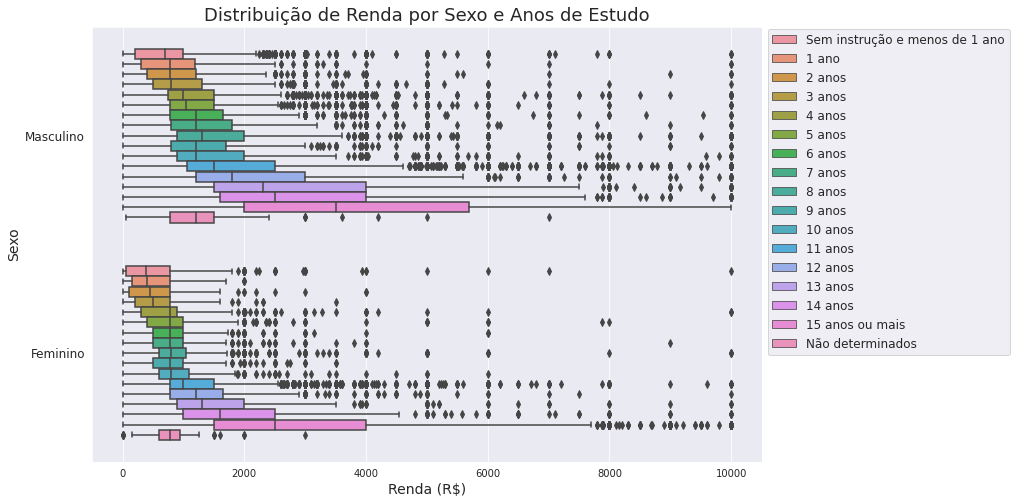

In [173]:
ax = sns.boxplot(data=df.query("renda <= 10000"), x='renda', y='sexo', hue='anos_de_estudo', orient='h')
ax.figure.set_size_inches(12, 8)
ax.set_title('Distribuição de Renda por Sexo e Anos de Estudo', fontsize=18)
ax.set_xlabel('Renda (R$)', fontsize=14)
ax.set_ylabel('Sexo', fontsize=14)
ax.set_yticklabels(labels=sexo_rotulos, fontsize=12)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, anos_de_estudo_rotulos, fontsize=12, bbox_to_anchor=(1, 1.01))
bx = ax

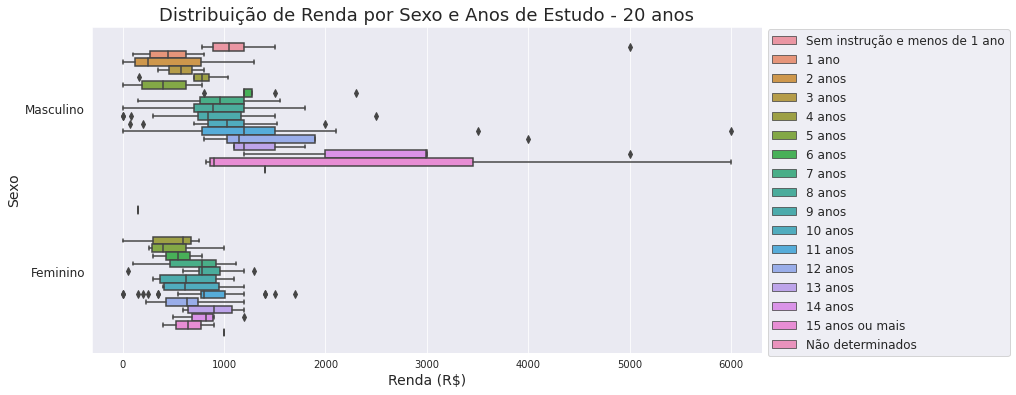

In [174]:
idade = 20
ax = sns.boxplot(data=df.query(f"renda <= 10000 and idade=={idade}"), x='renda', y='sexo', hue='anos_de_estudo', orient='h')
ax.figure.set_size_inches(12, 6)
ax.set_title(f"Distribuição de Renda por Sexo e Anos de Estudo - {idade} anos", fontsize=18)
ax.set_xlabel('Renda (R$)', fontsize=14)
ax.set_ylabel('Sexo', fontsize=14)
ax.set_yticklabels(labels=sexo_rotulos, fontsize=12)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, anos_de_estudo_rotulos, fontsize=12, bbox_to_anchor=(1, 1.01))
bx = ax

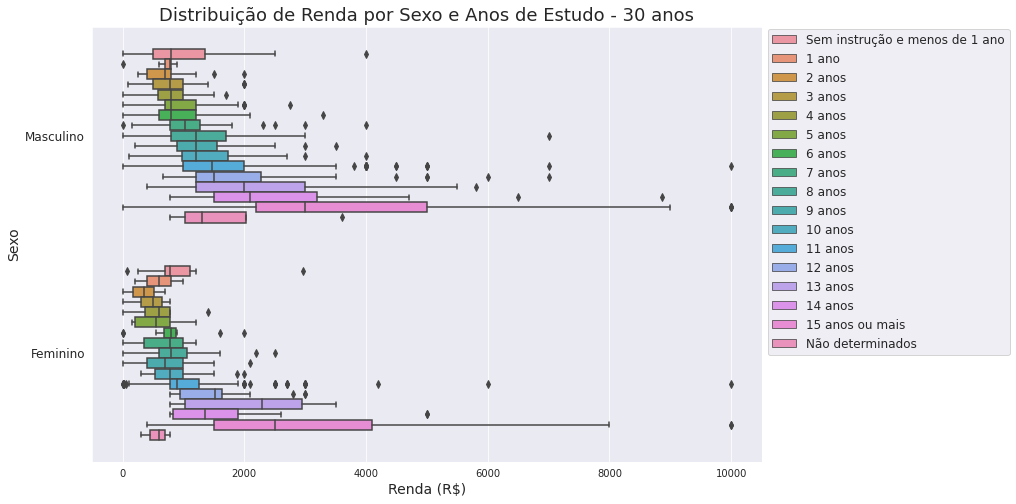

In [175]:
idade = 30
ax = sns.boxplot(data=df.query(f"renda <= 10000 and idade=={idade}"), x='renda', y='sexo', hue='anos_de_estudo', orient='h')
ax.figure.set_size_inches(12, 8)
ax.set_title(f"Distribuição de Renda por Sexo e Anos de Estudo - {idade} anos", fontsize=18)
ax.set_xlabel('Renda (R$)', fontsize=14)
ax.set_ylabel('Sexo', fontsize=14)
ax.set_yticklabels(labels=sexo_rotulos, fontsize=12)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, anos_de_estudo_rotulos, fontsize=12, bbox_to_anchor=(1, 1.01))
bx = ax

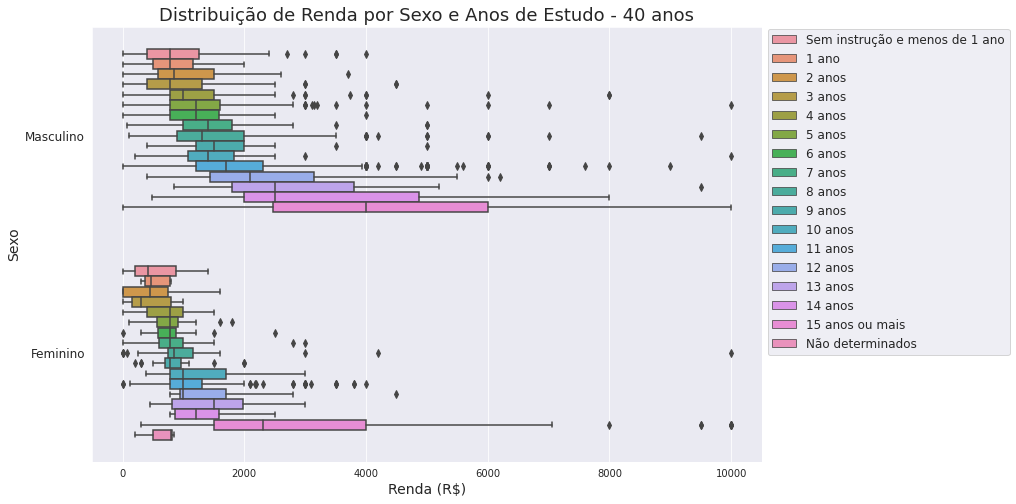

In [176]:
idade = 40
ax = sns.boxplot(data=df.query(f"renda <= 10000 and idade=={idade}"), x='renda', y='sexo', hue='anos_de_estudo', orient='h')
ax.figure.set_size_inches(12, 8)
ax.set_title(f"Distribuição de Renda por Sexo e Anos de Estudo - {idade} anos", fontsize=18)
ax.set_xlabel('Renda (R$)', fontsize=14)
ax.set_ylabel('Sexo', fontsize=14)
ax.set_yticklabels(labels=sexo_rotulos, fontsize=12)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, anos_de_estudo_rotulos, fontsize=12, bbox_to_anchor=(1, 1.01))
bx = ax

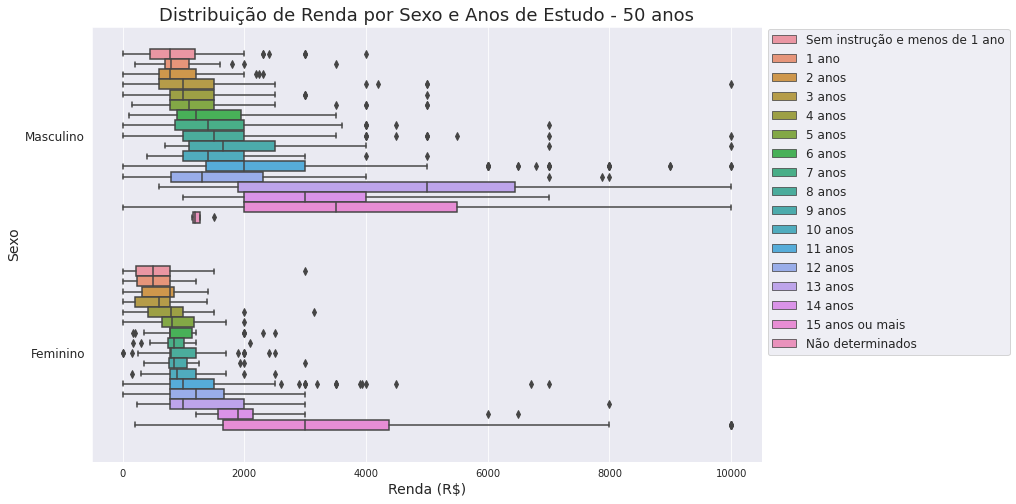

In [177]:
idade = 50
ax = sns.boxplot(data=df.query(f"renda <= 10000 and idade=={idade}"), x='renda', y='sexo', hue='anos_de_estudo', orient='h')
ax.figure.set_size_inches(12, 8)
ax.set_title(f"Distribuição de Renda por Sexo e Anos de Estudo - {idade} anos", fontsize=18)
ax.set_xlabel('Renda (R$)', fontsize=14)
ax.set_ylabel('Sexo', fontsize=14)
ax.set_yticklabels(labels=sexo_rotulos, fontsize=12)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, anos_de_estudo_rotulos, fontsize=12, bbox_to_anchor=(1, 1.01))
bx = ax

#### 6.5.5 Obter a média, mediana, valor máximo e desvio-padrão da variável `renda` segundo as Unidade da Federação

In [178]:
uf = {11: 'Rondônia', 
      12: 'Acre', 
      13: 'Amazonas', 
      14: 'Roraima', 
      15: 'Pará', 
      16: 'Amapá', 
      17: 'Tocantins', 
      21: 'Maranhão', 
      22: 'Piauí', 
      23: 'Ceará', 
      24: 'Rio Grande do Norte', 
      25: 'Paraíba', 
      26: 'Pernambuco', 
      27: 'Alagoas', 
      28: 'Sergipe', 
      29: 'Bahia', 
      31: 'Minas Gerais', 
      32: 'Espírito Santo', 
      33: 'Rio de Janeiro', 
      35: 'São Paulo', 
      41: 'Paraná', 
      42: 'Santa Catarina', 
      43: 'Rio Grande do Sul', 
      50: 'Mato Grosso do Sul', 
      51: 'Mato Grosso', 
      52: 'Goiás', 
      53: 'Distrito Federal'}

In [179]:
df.groupby(['uf']).agg({'renda': ['mean', 'median', 'max', 'std']}).rename(index=uf).sort_index()

renda                             
                            mean  median     max          std
uf                                                           
Acre                 1506.091782   900.0   30000  2276.233415
Alagoas              1144.552602   788.0   11000  1237.856197
Amapá                1861.353516  1200.0   15580  2020.688632
Amazonas             1445.130100   900.0   22000  1757.935591
Bahia                1429.645094   800.0  200000  3507.917248
Ceará                1255.403692   789.0   25000  1821.963536
Distrito Federal     4241.954722  2000.0  100000  5550.463338
Espírito Santo       2026.383852  1274.0  100000  3513.846868
Goiás                1994.580794  1500.0   30000  2221.933065
Maranhão             1019.432009   700.0   30000  1887.816905
Mato Grosso          2130.652778  1500.0   35000  2542.630178
Mato Grosso do Sul   2262.604167  1500.0   42000  3031.419122
Minas Gerais         2056.432084  1200.0  100000  3584.721547
Paraná               2493.870753  1500.0  200000  4302.937995
Paraíba              1293.370487   788.0   30000  1950.272431
Pará                 1399.076871   850.0   50000  2053.779555
Pernambuco           1527.079319   900.0   50000  2389.622497
Piauí                1074.550784   750.0   40000  2373.355726
Rio Grande do Norte  1344.721480   800.0   15500  1651.805500
Rio Grande do Sul    2315.158336  1500.0   35000  2913.335783
Rio de Janeiro       2496.403168  1400.0  200000  5214.583518
Rondônia             1789.761223  1200.0   50000  2406.161161
Roraima              1783.588889  1000.0   20000  2079.659238
Santa Catarina       2470.854945  1800.0   80000  3137.651112
Sergipe              1109.111111   788.0   16000  1478.997878
São Paulo            2638.104986  1600.0   80000  3503.777366
Tocantins            1771.094946  1000.0   60000  2934.590741

#### 6.5.6 Boxplot da variável `renda` as Unidade da Federação

In [180]:
uf_rotulos = list(uf.values())

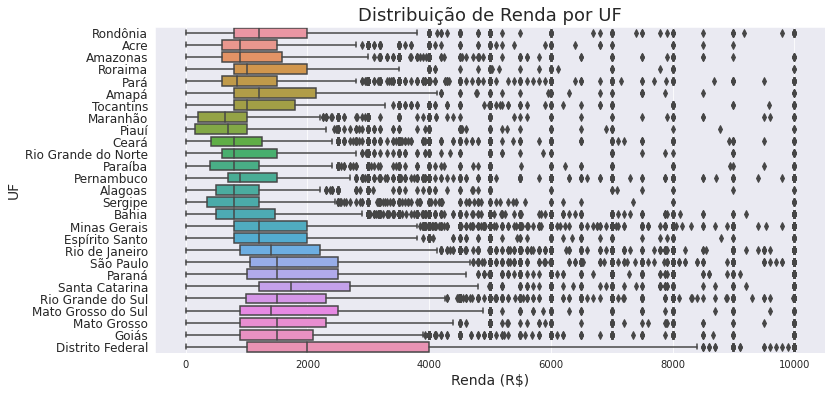

In [181]:
ax = sns.boxplot(data=df.query("renda <= 10000"), x='renda', y='uf', orient='h')
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Renda por UF', fontsize=18)
ax.set_xlabel('Renda (R$)', fontsize=14)
ax.set_ylabel('UF', fontsize=14)
ax.set_yticklabels(labels=uf_rotulos, fontsize=12)
# handles, _ = ax.get_legend_handles_labels()
# ax.legend(handles, anos_de_estudo_rotulos, fontsize=12, bbox_to_anchor=(1, 1.01))
bx = ax